# 0. 数据处理

In [1]:
import numpy as np
import pandas as pd
import doubleml as dml
import os
import pingouin as pg
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV, LogisticRegressionCV,LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, log_loss
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier, XGBRegressor
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import FactorAnalysis
from sklearn.feature_selection import mutual_info_classif
from semopy import Model
import copy

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [2]:
sns.set()
colors = sns.color_palette()

In [3]:
plt.rcParams['figure.figsize'] = 10., 7.5
sns.set(font_scale=1.5)
sns.set_style('whitegrid', {'axes.spines.top': False,
                            'axes.spines.bottom': False,
                            'axes.spines.left': False,
                            'axes.spines.right': False})
mpl.rcParams['font.family'] = 'Times New Roman'

In [4]:
data = pd.read_csv(r"D:\论文数据\2025.2 出口选择\20190519+问卷统计表.csv", encoding='utf-8') 

In [5]:
'''
    '性别': 'Gen',
    '年龄段': 'Age',
    '教育程度': 'Edu',
    '行动能力': 'Mob',
    '您乘坐客船的经历（不含本次）': 'PCE',
    '与您一起出行的人员数量': 'GS',
    '接受船舶疏散教育/训练的经历': 'ET',                     
    '听到疏散逃生警报，您会等待工作人员确认后再行动': 'WFS',
    '听到疏散逃生警报，您会立即疏散逃生': 'EI',
    '听到疏散逃生警报，您会观察其他人的动静再行动': 'OO',
    '假如听到疏散逃生警报，您会自行开门查看确认': 'PC',      
    '疏散逃生时，您会选择距离最近的出口': 'NE',  #
    '疏散逃生时，您会选择最熟悉的出口': 'FE',  #
    '疏散逃生时，您会选择跟着大多数人走': 'FM',  #
    '疏散逃生时，您会选择听从疏散指示或广播': 'FI',  #       
    '您会耐心排队等待': 'QP',
    '您会自行寻找其他出口': 'SOE',  
    '您会往前挤行': 'SF',
    '您会听从船员引导': 'OC',
    '贵重物品遗留，您是否会返回寻找': 'RIV',
    '家人遗留，您是否会返回寻找': 'RIF',
    '疏散过程中，您是否会协助他人进行疏散': 'HO',
    '疏散过程中，您是否会超越他人或向前挤行': 'OtO',
    '疏散逃生时，您是否会寻找同伴一起逃生': 'FC',
    '假如发生火灾，您是否会出现恐慌心理': 'EP',
    '疏散时，您是否会携带大件行李箱': 'CL',
    '疏散时，您是否会跟从团队中的临时领导者': 'FL'
'''

"\n    '性别': 'Gen',\n    '年龄段': 'Age',\n    '教育程度': 'Edu',\n    '行动能力': 'Mob',\n    '您乘坐客船的经历（不含本次）': 'PCE',\n    '与您一起出行的人员数量': 'GS',\n    '接受船舶疏散教育/训练的经历': 'ET',                     \n    '听到疏散逃生警报，您会等待工作人员确认后再行动': 'WFS',\n    '听到疏散逃生警报，您会立即疏散逃生': 'EI',\n    '听到疏散逃生警报，您会观察其他人的动静再行动': 'OO',\n    '假如听到疏散逃生警报，您会自行开门查看确认': 'PC',      \n    '疏散逃生时，您会选择距离最近的出口': 'NE',  #\n    '疏散逃生时，您会选择最熟悉的出口': 'FE',  #\n    '疏散逃生时，您会选择跟着大多数人走': 'FM',  #\n    '疏散逃生时，您会选择听从疏散指示或广播': 'FI',  #       \n    '您会耐心排队等待': 'QP',\n    '您会自行寻找其他出口': 'SOE',  \n    '您会往前挤行': 'SF',\n    '您会听从船员引导': 'OC',\n    '贵重物品遗留，您是否会返回寻找': 'RIV',\n    '家人遗留，您是否会返回寻找': 'RIF',\n    '疏散过程中，您是否会协助他人进行疏散': 'HO',\n    '疏散过程中，您是否会超越他人或向前挤行': 'OtO',\n    '疏散逃生时，您是否会寻找同伴一起逃生': 'FC',\n    '假如发生火灾，您是否会出现恐慌心理': 'EP',\n    '疏散时，您是否会携带大件行李箱': 'CL',\n    '疏散时，您是否会跟从团队中的临时领导者': 'FL'\n"

In [6]:
rename_dict = {
    '性别': 'Gender',
    '年龄段': 'Age',
    '教育程度': 'Educational Attainment',
    '行动能力': 'Mobility',
    '您乘坐客船的经历（不含本次）': 'Experience of Traveling by Ship',
    '与您一起出行的人员数量': 'Number of Companions',
    '接受船舶疏散教育/训练的经历': 'Experience in evacuation education/ training',                     
    '听到疏散逃生警报，您会等待工作人员确认后再行动': 'Waiting for staff confirmation', # Waiting for staff confirmation
    '听到疏散逃生警报，您会立即疏散逃生': 'Escape immediately', # Escape immediately
    '听到疏散逃生警报，您会观察其他人的动静再行动': 'Observe others\' movements', # Observe others movements
    '假如听到疏散逃生警报，您会自行开门查看确认': 'Proactive confirmation',  # Proactive confirmation   
    '疏散逃生时，您会选择距离最近的出口': 'Choose the nearest exit',  #Choose the nearest exit*
    '疏散逃生时，您会选择最熟悉的出口': 'Choose the most familiar exit',  #Choose the most familiar exit*
    '疏散逃生时，您会选择跟着大多数人走': 'Follow the majority',  # Follow the majority*
    '疏散逃生时，您会选择听从疏散指示或广播': 'Follow the evaouation guide',  #Follow the evaouation guide*       
    '您会耐心排队等待': 'Queuing patiently', #Queuing patiently
    '您会自行寻找其他出口': 'Self-Finding other exits',  #Self-Finding other exits 
    '您会往前挤行': 'Squeezing forward', #Squeezing forward
    '您会听从船员引导': 'Obeying the crew', #Obeying the crew
    '贵重物品遗留，您是否会返回寻找': 'Return if valuables left', #Return if valuables left
    '家人遗留，您是否会返回寻找': 'Return if family left', #Return if family left
    '疏散过程中，您是否会协助他人进行疏散': 'Help others', #Help others
    '疏散过程中，您是否会超越他人或向前挤行': 'Overtaking Others',#Overtaking Others
    '疏散逃生时，您是否会寻找同伴一起逃生': 'Find companion together', #Find companion together
    '假如发生火灾，您是否会出现恐慌心理': 'Experiencing panic during fire', #Experiencing panic during fire
    '疏散时，您是否会携带大件行李箱': 'Carry luggage during escape', #Carry luggage during escape
    '疏散时，您是否会跟从团队中的临时领导者': 'Follow the temporary leader'  #Follow the temporary leade
}
data.rename(columns=rename_dict, inplace=True)

In [7]:
data = data.drop('序号', axis=1)
df = pd.DataFrame(data.values - 1, columns=data.columns)

核心目标：<span style="font-size:20px; color:blue">'Choose the nearest exit', 'Choose the most familiar exit',
       'Follow the majority', 'Follow the evaouation guide'</span>

In [8]:
df.columns

Index(['Gender', 'Age', 'Educational Attainment', 'Mobility',
       'Experience of Traveling by Ship', 'Number of Companions',
       'Experience in evacuation education/ training',
       'Waiting for staff confirmation', 'Escape immediately',
       'Observe others' movements', 'Proactive confirmation',
       'Choose the nearest exit', 'Choose the most familiar exit',
       'Follow the majority', 'Follow the evaouation guide',
       'Queuing patiently', 'Self-Finding other exits', 'Squeezing forward',
       'Obeying the crew', 'Return if valuables left', 'Return if family left',
       'Help others', 'Overtaking Others', 'Find companion together',
       'Experiencing panic during fire', 'Carry luggage during escape',
       'Follow the temporary leader'],
      dtype='object')

<span style="font-size:20px; color:blue">信效度检验</span>

In [9]:
alpha = pg.cronbach_alpha(data=df)
print(f'Cronbach\'s Alpha: {alpha[0]:.4f}')

Cronbach's Alpha: 0.8533


In [10]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import bartlett

# 选择适合进行因子分析的数值型数据列
data_for_fa = df.select_dtypes(include=['float64', 'int64'])

# KMO检验
kmo_all, kmo_model = calculate_kmo(data_for_fa)
print(f"KMO检验结果：{kmo_model}")

# Bartlett球形度检验
chi_square_value, p_value = bartlett(*[data_for_fa[col] for col in data_for_fa.columns])
print(f"Bartlett球形度检验结果：\nChi-square value: {chi_square_value}, p-value: {p_value}")

# 判断KMO值
if kmo_model > 0.6:
    print("KMO值适合做因子分析")
else:
    print("KMO值不适合做因子分析")

# 判断Bartlett球形度检验结果
if p_value < 0.05:
    print("拒绝原假设，数据适合做因子分析")
else:
    print("无法拒绝原假设，数据不适合做因子分析")


KMO检验结果：0.8528195713538843
Bartlett球形度检验结果：
Chi-square value: 2443.001659243642, p-value: 0.0
KMO值适合做因子分析
拒绝原假设，数据适合做因子分析


In [11]:
# 前部变量（行为与心理因素）
front_vars = ['Gender', 'Age', 'Educational Attainment', 'Mobility',
       'Experience of Traveling by Ship', 'Number of Companions',
       'Experience in evacuation education/ training',
       'Waiting for staff confirmation', 'Escape immediately',
       'Observe others\' movements', 'Proactive confirmation',
       'Queuing patiently', 'Self-Finding other exits ', 'Squeezing forward',
       'Obeying the crew', 'Return if valuables left', 'Return if family left',
       'Help others', 'Overtaking Others', 'Find companion together',
       'Experiencing panic during fire', 'Carry luggage during escape',
       'Follow the temporary leade']

# 后部变量（出口选择行为）
exit_vars = [ 'Choose the nearest exit', 'Choose the most familiar exit',
       'Follow the majority', 'Follow the evaouation guide']

预设研究方向
接受过疏散教育（ET）如何影响“最近出口（NE）”？
恐慌心理（PDF）如何影响“跟随他人（FC）”或“拥挤（PF）”？
同行人数（GS）如何影响“耐心排队（WIQ）”或“自行寻找出口（FOE）”？

# 1. 常规

<span style="font-size:30px">1.1.验证数据是否为正态分布以确定处理方法</span>

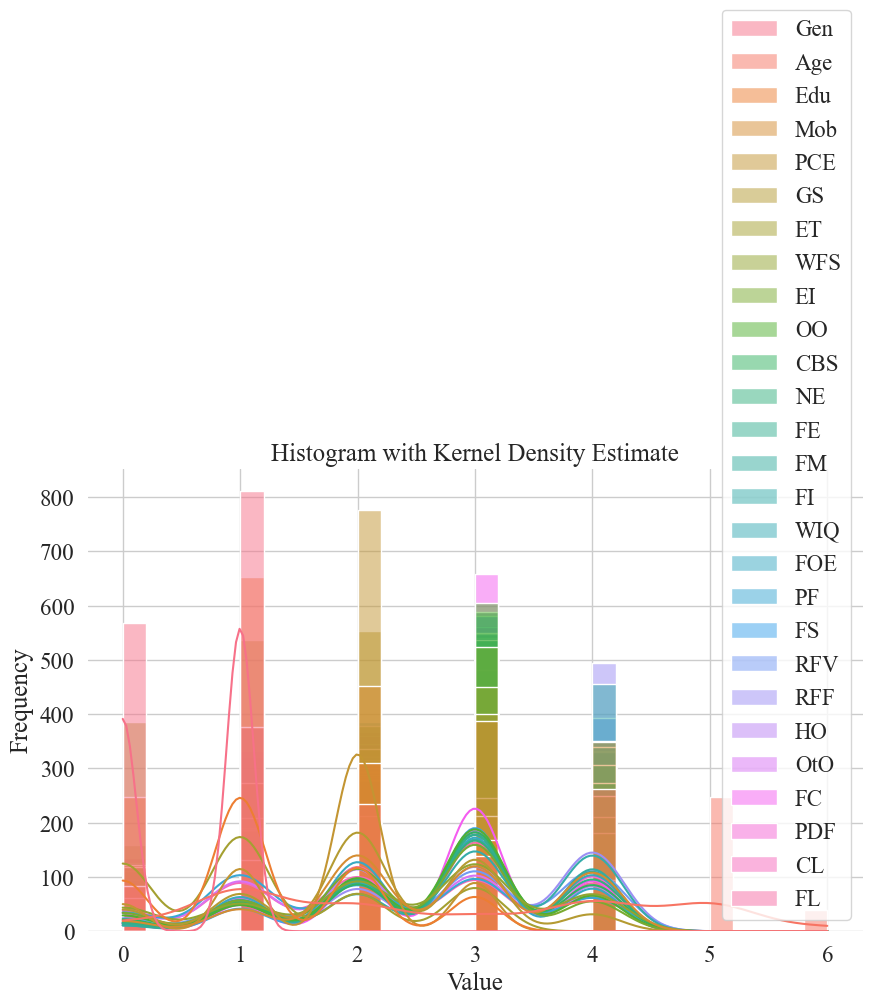

In [11]:
# 直方图
plt.figure(figsize=(10,6))
sns.histplot(df, bins=30, kde=True)
plt.title('Histogram with Kernel Density Estimate')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [12]:
#Anderson-Darling检验
from scipy.stats import anderson
data = data.values.ravel()
result = anderson(data)
print(f'Anderson-Darling统计量={result.statistic:.2f}')
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f'在{sl}%显著性水平下接受正态性假设')
    else:
        print(f'在{sl}%显著性水平下拒绝正态性假设')

Anderson-Darling统计量=1236.39
在15.0%显著性水平下拒绝正态性假设
在10.0%显著性水平下拒绝正态性假设
在5.0%显著性水平下拒绝正态性假设
在2.5%显著性水平下拒绝正态性假设
在1.0%显著性水平下拒绝正态性假设


In [43]:
from scipy.stats import wilcoxon

# 设置中立值
neutral_value = 3

# 创建一个字典用于存储每列的检验结果
results = {}

# 遍历每一列
for column in df.columns:
    # 仅对数值类型的列进行检验
    if df[column].dtype in ['float64', 'int64']:
        # 计算该列与中立值的差值
        diff = df[column] - neutral_value
        
        # 执行 Wilcoxon 单样本检验
        stat, p_value = wilcoxon(diff)
        
        # 存储检验结果
        results[column] = {'statistic': stat, 'p_value': p_value}

# 打印检验结果
for column, result in results.items():
    print(f"Column: {column}")
    print(f"Statistic: {result['statistic']}, p-value: {result['p_value']}")
    if result['p_value'] < 0.05:
        print("拒绝零假设，均值不等于中立值 3\n")
    else:
        print("无法拒绝零假设，均值等于中立值 3\n")


Column: Gender
Statistic: 0.0, p-value: 1.2485858233232185e-243
拒绝零假设，均值不等于中立值 3

Column: Age
Statistic: 311388.5, p-value: 1.5073191459253787e-09
拒绝零假设，均值不等于中立值 3

Column: Educational Attainment
Statistic: 0.0, p-value: 3.551624353747097e-209
拒绝零假设，均值不等于中立值 3

Column: Mobility
Statistic: 139949.0, p-value: 7.66125881841549e-37
拒绝零假设，均值不等于中立值 3

Column: Experience of Traveling by Ship
Statistic: 0.0, p-value: 2.030504250168003e-208
拒绝零假设，均值不等于中立值 3

Column: Number of Companions
Statistic: 30827.5, p-value: 3.1199773387209108e-133
拒绝零假设，均值不等于中立值 3

Column: Experience in evacuation education/ training
Statistic: 0.0, p-value: 2.5508864034879534e-194
拒绝零假设，均值不等于中立值 3

Column: Waiting for staff confirmation
Statistic: 72832.5, p-value: 3.1524801770327965e-73
拒绝零假设，均值不等于中立值 3

Column: Escape immediately
Statistic: 50680.0, p-value: 7.130894759417538e-81
拒绝零假设，均值不等于中立值 3

Column: Observe others' movements
Statistic: 55598.5, p-value: 1.4160839620931911e-56
拒绝零假设，均值不等于中立值 3

Column: Proactive

可以使用斯皮尔曼相关系数，卡方检验<span style="color:blue">（分类变量间的独立性检验）</span>，曼-惠特尼U检验<span style="color:blue">(两组独立样本的比较)</span>， Kruskal-Wallis H检验<span style="color:blue">(多组独立样本的比较)</span>，逻辑回归<span style="color:blue">(分类结果变量的多因素分析)</span>等

<span style="color:green">有序变量：'年龄段': 'Age','教育程度': 'Edu','行动能力': 'Mob','您乘坐客船的经历（不含本次）': 'PCE','接受船舶疏散教育/训练的经历': 'ET'</span>

<span style="font-size:30px; color:green">1.2.1卡方检验</span>

In [12]:
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests

def cramers_v(contingency_table):
    """计算Cramer's V效应量"""
    try:
        chi2 = chi2_contingency(contingency_table, correction=False)[0]
        n = contingency_table.sum().sum()
        if n == 0:
            return 0.0
        phi2 = chi2 / n
        r, k = contingency_table.shape
        return np.sqrt(phi2 / min(k-1, r-1))
    except:
        return np.nan


In [13]:
results = []
p_values = []

# 遍历所有变量组合results = []
p_values = []

# 遍历所有变量组合
for f_var in front_vars:
    for e_var in exit_vars:
        try:
            # 检查列是否存在
            if f_var not in df.columns or e_var not in df.columns:
                print(f"变量不存在：{f_var} 或 {e_var}")
                continue
                
            # 生成列联表
            contingency = pd.crosstab(df[f_var], df[e_var])
            
            # 卡方检验
            chi2, p, dof, _ = chi2_contingency(contingency)
            
            # 计算效应量
            v = cramers_v(contingency)
            
            # 存储结果
            results.append({
                '前因变量': f_var,
                '后果变量': e_var,
                '卡方值': chi2,
                'p值': p,
                '自由度': dof,
                'Cramers_V': v
            })
            p_values.append(p)
        except Exception as e:
            print(f"错误：{f_var} vs {e_var} - {str(e)}")
            results.append({
                '前因变量': f_var,
                '后果变量': e_var,
                '卡方值': np.nan,
                'p值': np.nan,
                '自由度': np.nan,
                'Cramers_V': np.nan
            })
            p_values.append(np.nan)

# 多重检验校正（Benjamini-Hochberg方法）
reject, p_corrected, _, _ = multipletests(p_values, method='fdr_bh')

# 创建结果数据框
result_df = pd.DataFrame(results)
result_df['校正后p值'] = p_corrected
result_df['是否显著'] = result_df['校正后p值'] < 0.05

变量不存在：Self-Finding other exits  或 Choose the nearest exit
变量不存在：Self-Finding other exits  或 Choose the most familiar exit
变量不存在：Self-Finding other exits  或 Follow the majority
变量不存在：Self-Finding other exits  或 Follow the evaouation guide
变量不存在：Follow the temporary leade 或 Choose the nearest exit
变量不存在：Follow the temporary leade 或 Choose the most familiar exit
变量不存在：Follow the temporary leade 或 Follow the majority
变量不存在：Follow the temporary leade 或 Follow the evaouation guide


In [14]:
# 输出到 Excel 文件
output_path = r"D:\论文数据\2025.2 出口选择"  # 指定路径
output_file = "卡方检验 + 效应量分析.xlsx"  # 文件名
full_path = f"{output_path}\\{output_file}"  # 完整路径

with pd.ExcelWriter(full_path, engine='openpyxl') as writer:
    result_df.to_excel(writer, sheet_name='完整结果', index=False)
    significant_df = result_df[result_df['是否显著']]
    significant_df.to_excel(writer, sheet_name='显著结果', index=False)


print(f"结果已保存到文件：{full_path}")

结果已保存到文件：D:\论文数据\2025.2 出口选择\卡方检验 + 效应量分析.xlsx


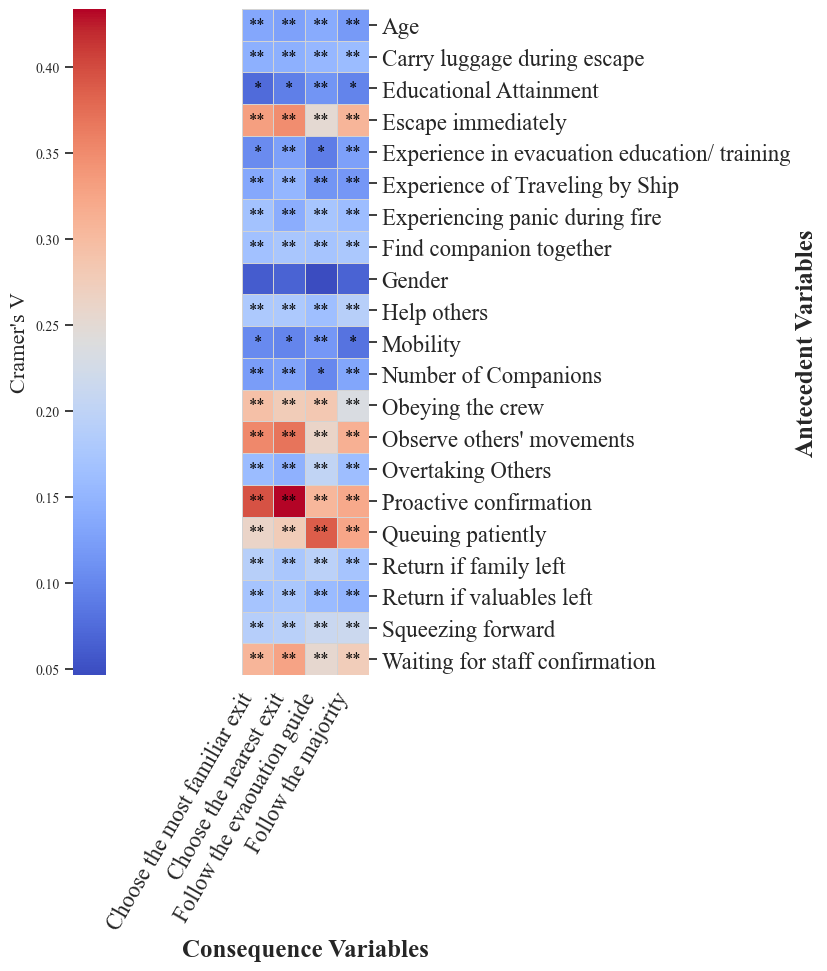

In [23]:
def plot_heatmap(results_df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import pandas as pd

    # 设置字体
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 16

    # 创建数据透视表
    heatmap_data = results_df.pivot(index='前因变量', 
                                    columns='后果变量', 
                                    values='Cramers_V')
    p_values_matrix = results_df.pivot(index='前因变量',
                                       columns='后果变量',
                                       values='校正后p值')

    # 创建显著性标记
    significance = pd.DataFrame(
        np.select(
            [p_values_matrix < 0.000001,p_values_matrix < 0.05],
            ['**','*'],
            default=''
        ),
        index=heatmap_data.index,
        columns=heatmap_data.columns
    )

    # 创建画布
    fig, ax = plt.subplots(figsize=(14, 10))

    # 绘制热力图
    sns.heatmap(
        heatmap_data,
        annot=significance,
        fmt="",
        cmap="coolwarm",
        cbar_kws={'label': "Cramer's V", 'location': 'left'},
        square=True,
        annot_kws={'size': 12, 'color': 'black'},
        linewidths=0.5,
        linecolor='lightgray',
        ax=ax
    )

    # 设置坐标轴标签
    ax.set_xlabel('Consequence Variables', fontweight='bold')
    
    # 把y轴标签移到右侧
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.set_ylabel('Antecedent Variables', fontweight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=360)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')

    # 设置颜色条字体
    cbar = ax.collections[0].colorbar
    cbar.ax.yaxis.label.set_fontproperties('Times New Roman')
    cbar.ax.tick_params(labelsize=10)

    # 调整布局
    plt.tight_layout()
    save_path = r"D:\论文数据\2025.2 出口选择\图片\chi2_heatmap.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()
plot_heatmap(result_df)

             ┌───────────────┬───────────────┐
              │ 高效应显著    │ 低效应显著    │
              │ (V≥0.3)      │ (V<0.3)      │
┌─────────────┼───────────────┼───────────────┤
│ 理论重要    │ CBS, WFS, EI  │ Age, Edu, Mob │
│ 实践可操作  │ OO, PCE       │ GS, ET, FL    │
└─────────────┴───────────────┴───────────────┘

虽然统计显著性是重要的，但在解释结果时还应考虑实际意义和上下文。此外，由于进行了多重检验，尽管已经使用了Benjamini-Hochberg方法来校正p值,任然存在一定的假阳性风险

In [ ]:
plot_heatmap(result_df)

<span style="font-size:30px; color:green">1.2.2斯皮尔曼相关系数</span>

In [14]:
from scipy import stats


In [17]:
# 计算斯皮尔曼相关系数矩阵
corr_matrix = df[front_vars + exit_vars].corr(method='spearman')

# 提取前部变量与后部变量的相关系数
front_exit_corr = corr_matrix.loc[front_vars, exit_vars]

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 保存结果到Excel
save_path = r'D:\论文数据\2025.2 出口选择\斯皮尔曼相关系数.xlsx'
front_exit_corr.to_excel('spearman_correlation.xlsx')
front_exit_corr.to_excel(save_path)

print(f'文件已成功保存至：{save_path}')

文件已成功保存至：D:\论文数据\2025.2 出口选择\斯皮尔曼相关系数.xlsx


In [18]:
def highlight_significant(val):
    if abs(val) >= 0.5:
        return 'color: red'
    elif abs(val) < 0.3:
        return 'color: blue'
    else:
        return ''

front_exit_corr.style.map(highlight_significant)

,Choose the nearest exit,Choose the most familiar exit,Follow the majority,Follow the evaouation guide
Gender,-0.010438,-0.037635,-0.004914,-0.027837
Age,0.139135,0.142328,0.134125,0.197891
Educational Attainment,0.067584,0.039923,0.002051,-0.056771
Mobility,-0.005718,0.003851,0.023527,0.063730
Experience of Traveling by Ship,0.158121,0.168875,0.161238,0.159304
Number of Companions,0.143252,0.158751,0.190062,0.122944
Experience in evacuation education/ training,0.152244,0.123916,0.101155,0.100073
Waiting for staff confirmation,0.382505,0.343277,0.320084,0.348030
Escape immediately,0.473883,0.434265,0.417999,0.369842
Observe others' movements,0.475754,0.461137,0.428709,0.372122


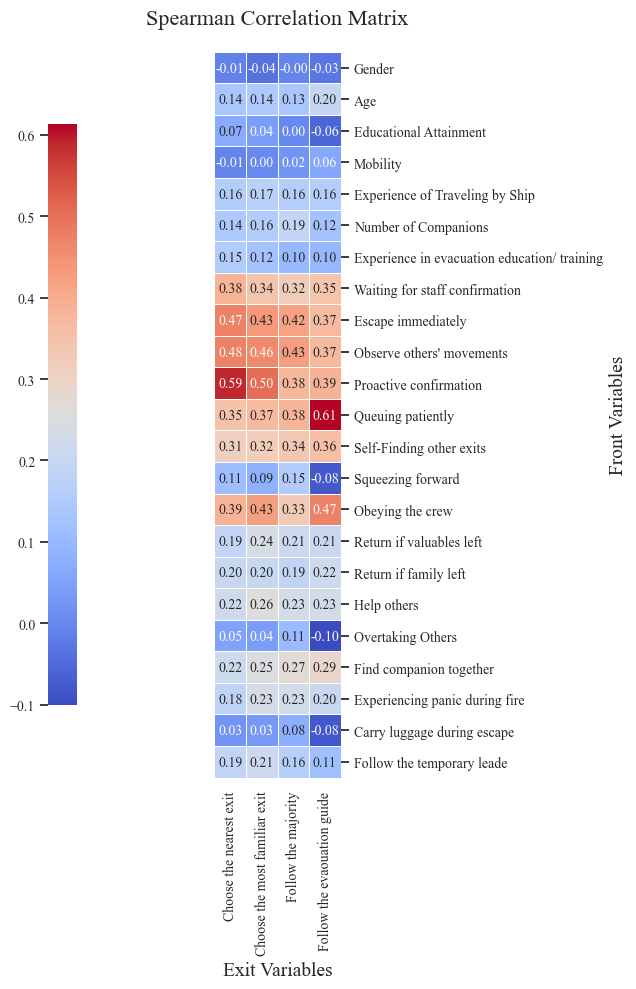

In [19]:
from matplotlib import rcParams

# 设置全局字体为 Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10

# 生成热力图
plt.figure(figsize=(14, 10))
ax = sns.heatmap(
    front_exit_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "location": "left"}  # 颜色条放左边
)

# 设置英文标题和标签
ax.set_title("Spearman Correlation Matrix", fontsize=16, pad=20)
ax.set_xlabel("Exit Variables", fontsize=14)

# 将Y轴标签放右边
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_ylabel("Front Variables", fontsize=14)

# 将Y轴刻度标签旋转90度
ax.set_yticklabels(ax.get_yticklabels(), rotation=360)

# 设置颜色条字体
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.label.set_fontproperties('Times New Roman')
cbar.ax.tick_params(labelsize=10)

# 保存高清图像
save_path = r"D:\论文数据\2025.2 出口选择\图片\spearman.png"
plt.tight_layout()
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

强正相关变量（|r|≥0.5）
中等正相关变量（0.3≤|r|<0.5）
弱相关或无关变量（|r|<0.3）

In [ ]:
# 前部变量（行为与心理因素）
front_vars = ['Gender', 'Age', 'Educational Attainment', 'Mobility',
       'Experience of Traveling by Ship', 'Number of Companions',
       'Experience in evacuation education/ training',
       'Waiting for staff confirmation', 'Escape immediately',
       'Observe others\' movements', 'Proactive confirmation',
       'Queuing patiently', 'Self-Finding other exits ', 'Squeezing forward',
       'Obeying the crew', 'Return if valuables left', 'Return if family left',
       'Help others', 'Overtaking Others', 'Find companion together',
       'Experiencing panic during fire', 'Carry luggage during escape',
       'Follow the temporary leade']

# 后部变量（出口选择行为）
exit_vars = [ 'Choose the nearest exit', 'Choose the most familiar exit',
       'Follow the majority', 'Follow the evaouation guide']

In [11]:
'''Best_front_vars = ['CBS','WIQ','OO','EI','WFS','FS'] #(>1.0)
Good_front_vars = ['CBS','WIQ','OO','EI','WFS','FS','FOE','PF','FC','RFF','HO'] #(>0.5)
Bad_front_vars = ['Gen','Edu','Mob','ET','PCE','GS','Age'] #(<0.25)
exit_vars = ['NE', 'FE', 'FM', 'FI']'''
#旧

# 2.因素分析

<span style="font-size:30px; color:red">根据因素分析，选出最佳因素</span>

<span style="font-size:30px; color:green">互信息</span>

In [16]:
# 计算互信息
mi_scores = {}
for exit_var in exit_vars:
    mi = mutual_info_classif(df[front_vars], df[exit_var], discrete_features='auto')
    mi_scores[exit_var] = dict(zip(front_vars, mi))

# 转换为DataFrame
mi_df = pd.DataFrame(mi_scores)

# 计算每个前部变量的平均影响力
mi_df["Mean_MI"] = mi_df.mean(axis=1)

# 按影响力排序
mi_df_sorted = mi_df.sort_values(by="Mean_MI", ascending=False)

print(mi_df_sorted)

                                              Choose the nearest exit  \
Proactive confirmation                                       0.296486   
Queuing patiently                                            0.150436   
Observe others' movements                                    0.208120   
Escape immediately                                           0.171661   
Waiting for staff confirmation                               0.152590   
Obeying the crew                                             0.113511   
Self-Finding other exits                                     0.097678   
Squeezing forward                                            0.056398   
Return if family left                                        0.058715   
Overtaking Others                                            0.036948   
Carry luggage during escape                                  0.049817   
Return if valuables left                                     0.019085   
Find companion together                            

In [17]:
# 获取按 Mean_MI 排序后的前部变量列表
sorted_front_vars = mi_df_sorted.index.tolist()

# 生成分组
grouped_front_vars = {}
for i in range(1, len(sorted_front_vars) + 1):
    group_name = f"front_vars_{i}"
    grouped_front_vars[group_name] = sorted_front_vars[:i]

# 打印分组结果
for group, vars_list in grouped_front_vars.items():
    print(f"{group} = {vars_list}")


front_vars_1 = ['Proactive confirmation']
front_vars_2 = ['Proactive confirmation', 'Queuing patiently']
front_vars_3 = ['Proactive confirmation', 'Queuing patiently', "Observe others' movements"]
front_vars_4 = ['Proactive confirmation', 'Queuing patiently', "Observe others' movements", 'Escape immediately']
front_vars_5 = ['Proactive confirmation', 'Queuing patiently', "Observe others' movements", 'Escape immediately', 'Waiting for staff confirmation']
front_vars_6 = ['Proactive confirmation', 'Queuing patiently', "Observe others' movements", 'Escape immediately', 'Waiting for staff confirmation', 'Obeying the crew']
front_vars_7 = ['Proactive confirmation', 'Queuing patiently', "Observe others' movements", 'Escape immediately', 'Waiting for staff confirmation', 'Obeying the crew', 'Self-Finding other exits ']
front_vars_8 = ['Proactive confirmation', 'Queuing patiently', "Observe others' movements", 'Escape immediately', 'Waiting for staff confirmation', 'Obeying the crew', 'Self-Fi

In [16]:
# 获取按 Mean_MI 排序后的前部变量列表
sorted_front_vars = mi_df_sorted.index.tolist()

# 生成分组
grouped_front_vars = {}
for i in range(1, len(sorted_front_vars) + 1):
    group_name = f"front_vars_{i}"
    grouped_front_vars[group_name] = sorted_front_vars[:i]

# 打印分组结果
for group, vars_list in grouped_front_vars.items():
    print(f"{group} = {vars_list}")

# 选择 front_vars_1
selected_vars = grouped_front_vars["front_vars_1"]

# 目标变量
exit_vars = ['NE', 'FE', 'FM', 'FI']

# 机器学习模型及超参数
models = {
    "KNN": (KNeighborsRegressor(), {"n_neighbors": [3, 5, 7, 9]}),
    "XGBOOST": (XGBRegressor(), {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1], "max_depth": [3, 6]}),
    "SVR": (SVR(), {"C": [0.1, 1, 10], "gamma": [0.01, 0.1, 1]}),
    "RF": (RandomForestRegressor(), {"n_estimators": [100, 200], "max_depth": [None, 10, 20]}),
    "LR": (LinearRegression(), {})
}

# 训练并评估模型
results = {}
for exit_var in exit_vars:
    X = df[selected_vars]
    y = df[exit_var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    results[exit_var] = {}
    for model_name, (model, param_grid) in models.items():
        if param_grid:
            grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
        else:
            best_model = model.fit(X_train, y_train)
        
        y_pred = best_model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results[exit_var][model_name] = rmse
        print(f"{model_name} on {exit_var}: RMSE = {rmse:.4f}")

# 输出最终结果
print(pd.DataFrame(results))

front_vars_1 = ['CBS']
front_vars_2 = ['CBS', 'WIQ']
front_vars_3 = ['CBS', 'WIQ', 'OO']
front_vars_4 = ['CBS', 'WIQ', 'OO', 'WFS']
front_vars_5 = ['CBS', 'WIQ', 'OO', 'WFS', 'EI']
front_vars_6 = ['CBS', 'WIQ', 'OO', 'WFS', 'EI', 'FS']
front_vars_7 = ['CBS', 'WIQ', 'OO', 'WFS', 'EI', 'FS', 'FOE']
front_vars_8 = ['CBS', 'WIQ', 'OO', 'WFS', 'EI', 'FS', 'FOE', 'PF']
front_vars_9 = ['CBS', 'WIQ', 'OO', 'WFS', 'EI', 'FS', 'FOE', 'PF', 'RFF']
front_vars_10 = ['CBS', 'WIQ', 'OO', 'WFS', 'EI', 'FS', 'FOE', 'PF', 'RFF', 'RFV']
front_vars_11 = ['CBS', 'WIQ', 'OO', 'WFS', 'EI', 'FS', 'FOE', 'PF', 'RFF', 'RFV', 'HO']
front_vars_12 = ['CBS', 'WIQ', 'OO', 'WFS', 'EI', 'FS', 'FOE', 'PF', 'RFF', 'RFV', 'HO', 'PDF']
front_vars_13 = ['CBS', 'WIQ', 'OO', 'WFS', 'EI', 'FS', 'FOE', 'PF', 'RFF', 'RFV', 'HO', 'PDF', 'FL']
front_vars_14 = ['CBS', 'WIQ', 'OO', 'WFS', 'EI', 'FS', 'FOE', 'PF', 'RFF', 'RFV', 'HO', 'PDF', 'FL', 'OtO']
front_vars_15 = ['CBS', 'WIQ', 'OO', 'WFS', 'EI', 'FS', 'FOE', 'PF', 'RFF', 'RFV

In [32]:
# 获取按 Mean_MI 排序后的前部变量列表
sorted_front_vars = mi_df_sorted.index.tolist()

# 生成分组
grouped_front_vars = {}
for i in range(1, len(sorted_front_vars) + 1):
    group_name = f"front_vars_{i}"
    grouped_front_vars[group_name] = sorted_front_vars[:i]

# 目标变量
exit_vars = ['NE', 'FE', 'FM', 'FI']

# 机器学习模型及超参数
models = {
    "KNN": (KNeighborsRegressor(), {"n_neighbors": [3, 5, 7, 9]}),
    "XGBOOST": (XGBRegressor(), {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1], "max_depth": [3, 6]}),
    "SVR": (SVR(), {"C": [0.1, 1, 10], "gamma": [0.01, 0.1, 1]}),
    "RF": (RandomForestRegressor(), {"n_estimators": [100, 200], "max_depth": [None, 10, 20]}),
    "LR": (LinearRegression(), {})
}

# 存储所有结果和最佳参数
all_results = []
best_params_results = []

# 遍历所有分组
for group_name, selected_vars in grouped_front_vars.items():
    for exit_var in exit_vars:
        X = df[selected_vars]
        y = df[exit_var]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        best_rmse = float('inf')
        best_model_name = None
        best_params = None
        
        for model_name, (model, param_grid) in models.items():
            if param_grid:
                grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
                grid_search.fit(X_train, y_train)
                best_model = grid_search.best_estimator_
                best_model_params = grid_search.best_params_
            else:
                best_model = model.fit(X_train, y_train)
                best_model_params = "Default"
            
            y_pred = best_model.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            
            # 记录所有结果
            all_results.append([group_name, exit_var, model_name, rmse])
            
            # 更新最佳模型信息
            if rmse < best_rmse:
                best_rmse = rmse
                best_model_name = model_name
                best_params = best_model_params
            
            print(f"{group_name} - {model_name} on {exit_var}: RMSE = {rmse:.4f}")
        
        # 记录最佳参数信息
        best_params_results.append([group_name, exit_var, best_model_name, best_rmse, best_params])

# 转换为 DataFrame 并保存
results_df = pd.DataFrame(all_results, columns=["Front_Vars_Group", "Exit_Var", "Model", "RMSE"])
output_path = r"D:\论文数据\2025.2 出口选择\因素分析\因素分析总表.xlsx"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
results_df.to_excel(output_path, index=False)

# 保存最佳参数信息
best_params_df = pd.DataFrame(best_params_results, columns=["Front_Vars_Group", "Exit_Var", "Best_Model", "Best_RMSE", "Best_Params"])
best_params_output_path = r"D:\论文数据\2025.2 出口选择\因素分析\因素分析最佳参数.xlsx"
best_params_df.to_excel(best_params_output_path, index=False)

print(f"结果已保存至 {output_path}")
print(f"最佳参数已保存至 {best_params_output_path}")

front_vars_1 - KNN on NE: RMSE = 0.8938
front_vars_1 - XGBOOST on NE: RMSE = 0.8578
front_vars_1 - SVR on NE: RMSE = 0.8839
front_vars_1 - RF on NE: RMSE = 0.8577
front_vars_1 - LR on NE: RMSE = 0.8632
front_vars_1 - KNN on FE: RMSE = 0.9474
front_vars_1 - XGBOOST on FE: RMSE = 0.9169
front_vars_1 - SVR on FE: RMSE = 0.9430
front_vars_1 - RF on FE: RMSE = 0.9168
front_vars_1 - LR on FE: RMSE = 0.9279
front_vars_1 - KNN on FM: RMSE = 0.9476
front_vars_1 - XGBOOST on FM: RMSE = 0.9417
front_vars_1 - SVR on FM: RMSE = 0.9600
front_vars_1 - RF on FM: RMSE = 0.9411
front_vars_1 - LR on FM: RMSE = 0.9595
front_vars_1 - KNN on FI: RMSE = 1.0201
front_vars_1 - XGBOOST on FI: RMSE = 0.9698
front_vars_1 - SVR on FI: RMSE = 0.9809
front_vars_1 - RF on FI: RMSE = 0.9695
front_vars_1 - LR on FI: RMSE = 0.9993
front_vars_2 - KNN on NE: RMSE = 0.8557
front_vars_2 - XGBOOST on NE: RMSE = 0.8491
front_vars_2 - SVR on NE: RMSE = 0.8633
front_vars_2 - RF on NE: RMSE = 0.8399
front_vars_2 - LR on NE: RMSE

# 2.0.机器学习+SHAP（废弃）

<span style="font-size:30px; color:green">XGBoost结合SHAP</span>

<span style="font-size:30px; color:red">NE</span>

In [23]:
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [24]:
X = df[Best_front_vars]
y = df['NE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
model01 = xgb.XGBClassifier()
model01.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

 94%|=================== | 1304/1380 [00:13<00:00]       

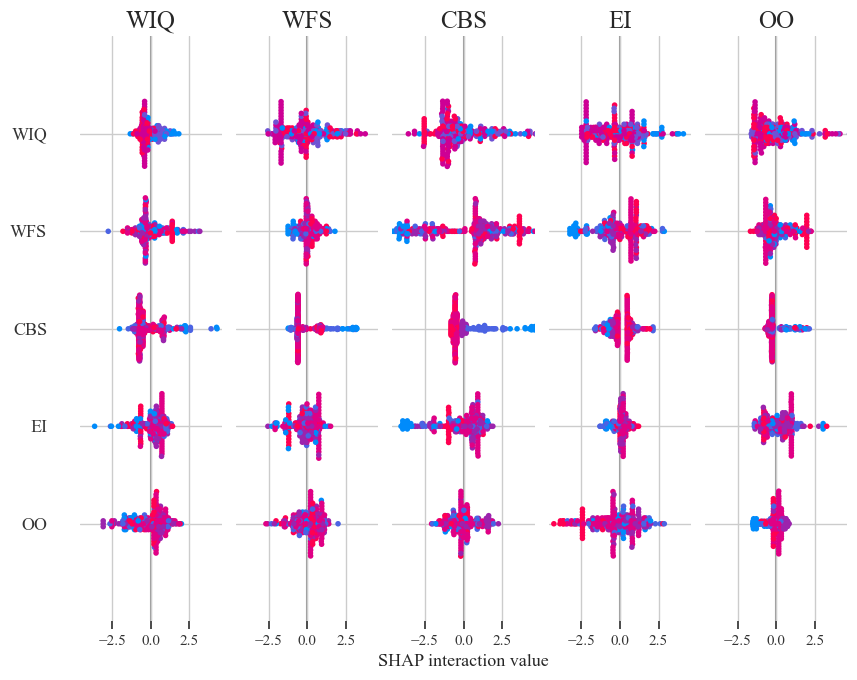

In [26]:
explainer = shap.Explainer(model01, X_train)
shap_values = explainer(X_test)

# 显式传递特征名称
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns,show=False)

# 确保绘图完成后保存
plt.savefig(r'D:\论文数据\2025.2 出口选择\图片\NE01.png', dpi=300)

plt.xticks(fontname="Times New Roman")
plt.yticks(fontname="Times New Roman")
plt.show()
plt.close()

In [27]:
print(shap_values.shape)  # 若输出为三维数组（如 (1000,5,5)），则为交互值

(276, 6, 5)


In [28]:
# 直接提取每个类别的主效应值（形状：5×276×22）
class_shap_main = [shap_values[:, :, i] for i in range(5)]

# 验证类别0的主效应值
shap_main_2d = class_shap_main[0]
print(shap_main_2d.shape)  # 输出 (276,22)

(276, 6)


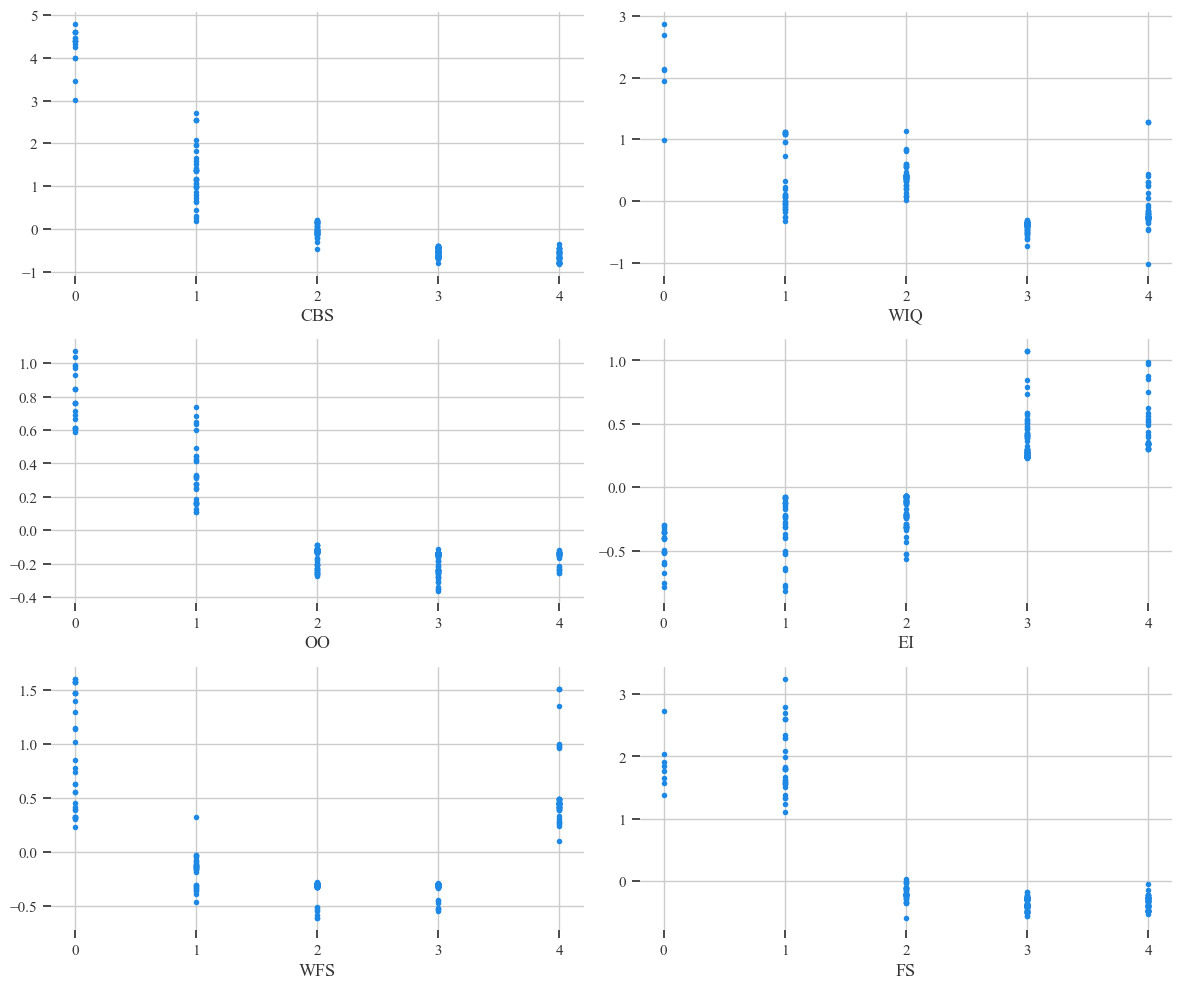

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()  # 将 axes 数组展平成一维

# 遍历每个特征进行绘图
for i, feature in enumerate(Best_front_vars):
    ax = axes[i]
    shap.dependence_plot(feature, shap_main_2d.values, X_test,interaction_index=None, ax=ax, show=False)

    # 只保留 X 轴整数刻度
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # 只显示 X 轴标签，不显示 Y 轴标签
    ax.set_ylabel("")  
    ax.set_xlabel(feature)  # 设置 X 轴标签为特征名称
plt.xticks(fontname="Times New Roman")
plt.yticks(fontname="Times New Roman")
# 调整布局
plt.tight_layout()
plt.savefig(r'D:\论文数据\2025.2 出口选择\图片\NE_dependence_all.png', dpi=300)
plt.show()

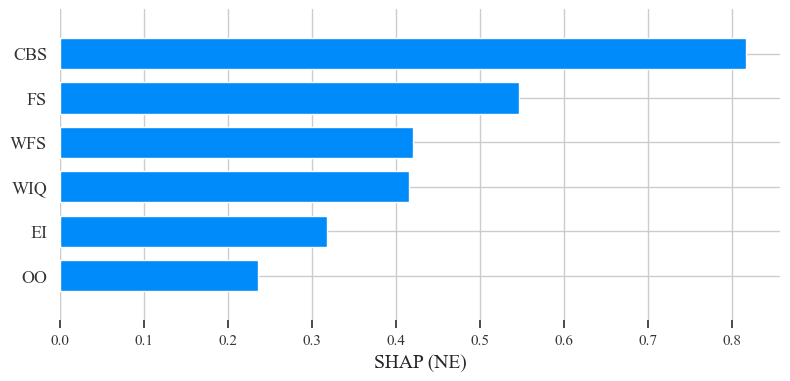

In [30]:
shap.summary_plot(shap_main_2d, X_test, plot_type="bar", feature_names=X_test.columns,show=False)
plt.xlabel("SHAP (NE)", fontsize=14)
# 设置所有字体为 Times New Roman
plt.xticks(fontname="Times New Roman")
plt.yticks(fontname="Times New Roman")
plt.savefig(r'D:\论文数据\2025.2 出口选择\图片\NE02.png')
plt.show()
plt.close()

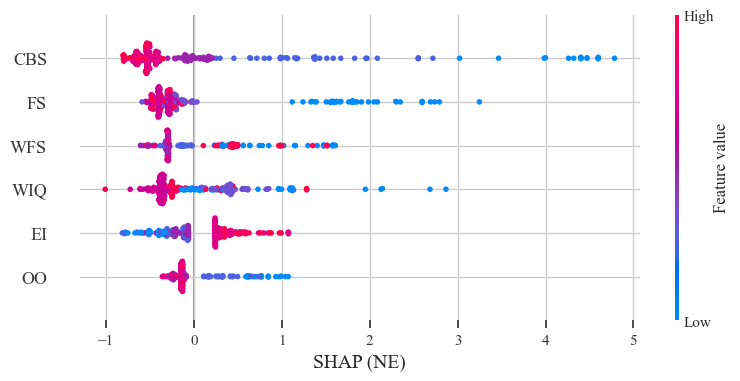

In [31]:
shap.summary_plot(shap_main_2d, X_test, feature_names=X_test.columns,show=False)
plt.xlabel("SHAP (NE)", fontsize=14)
# 设置所有字体为 Times New Roman
plt.xticks(fontname="Times New Roman")
plt.yticks(fontname="Times New Roman")
plt.savefig(r'D:\论文数据\2025.2 出口选择\图片\NE03.png', dpi=300)
plt.show()
plt.close()

<span style="font-size:30px; color:red">FM</span>

 99%|===================| 1368/1380 [00:13<00:00]        

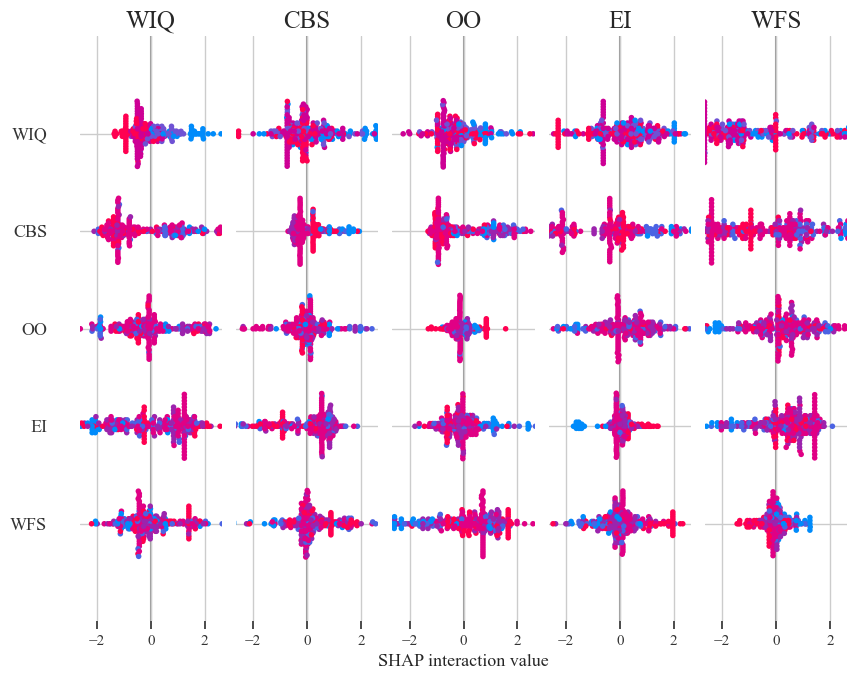

In [32]:
X = df[Best_front_vars]
y = df['FM']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model03 = xgb.XGBClassifier()
model03.fit(X_train, y_train)
explainer = shap.Explainer(model03, X_train)
shap_values = explainer(X_test)

# 显式传递特征名称
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns,show=False)
plt.savefig(r'D:\论文数据\2025.2 出口选择\图片\FM01.png', dpi=300)
plt.show()
plt.close()

In [33]:
# 直接提取每个类别的主效应值（形状：5×276×22）
class_shap_main = [shap_values[:, :, i] for i in range(5)]

# 验证类别0的主效应值
shap_main_2d = class_shap_main[0]
print(shap_main_2d.shape)  # 输出 (276,22)

(276, 6)


In [34]:
print("shap_values shape:", shap_values.values.shape)
print("X_test shape:", X_test.shape)


shap_values shape: (276, 6, 5)
X_test shape: (276, 6)


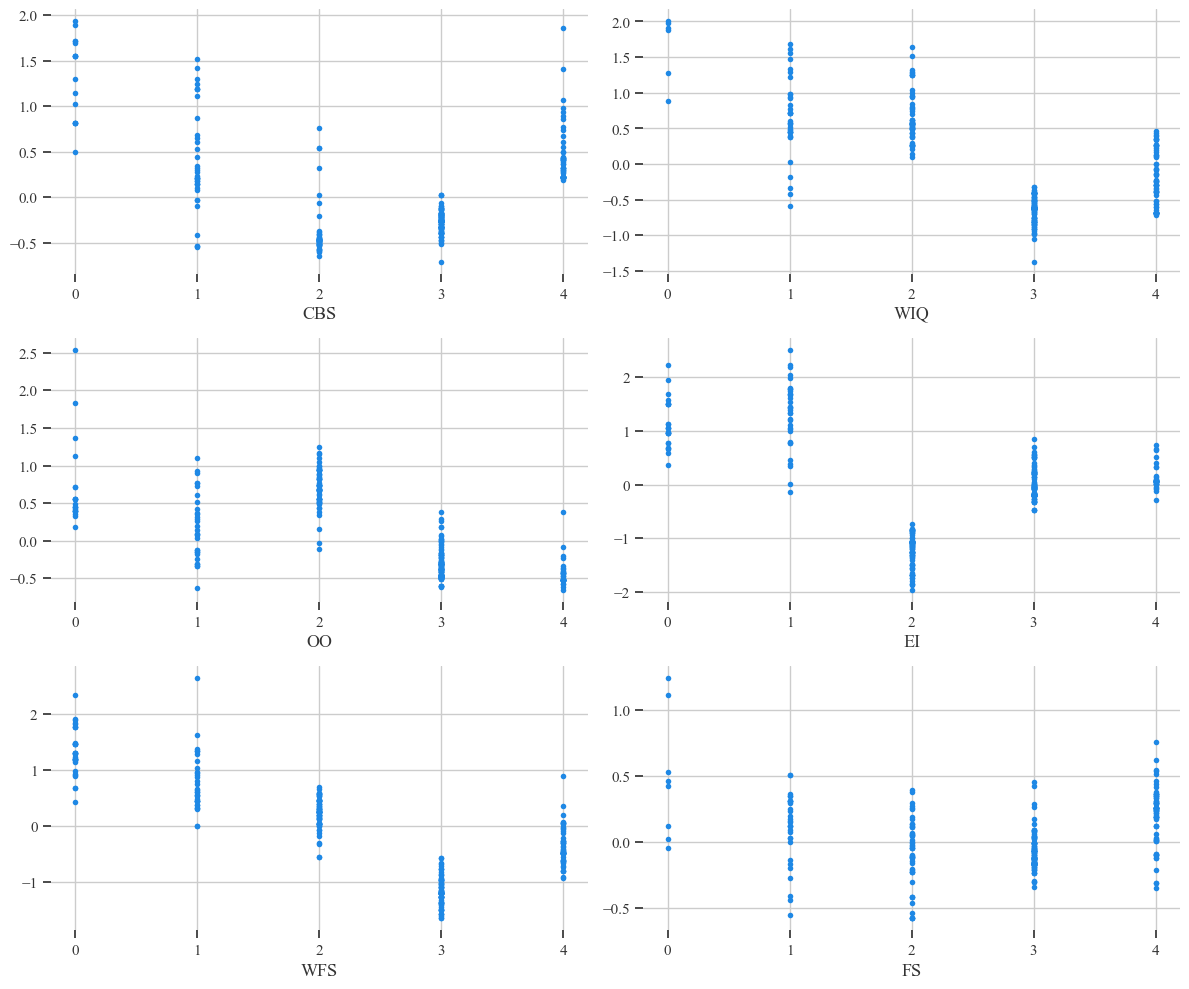

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()  # 将 axes 数组展平成一维

# 遍历每个特征进行绘图
for i, feature in enumerate(Best_front_vars):
    ax = axes[i]
    shap.dependence_plot(feature, shap_main_2d.values, X_test,interaction_index=None, ax=ax, show=False)

    # 只保留 X 轴整数刻度
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # 只显示 X 轴标签，不显示 Y 轴标签
    ax.set_ylabel("")  
    ax.set_xlabel(feature)  # 设置 X 轴标签为特征名称

# 调整布局
plt.tight_layout()
plt.savefig(r'D:\论文数据\2025.2 出口选择\图片\FM_dependence_all.png', dpi=300)
plt.show()

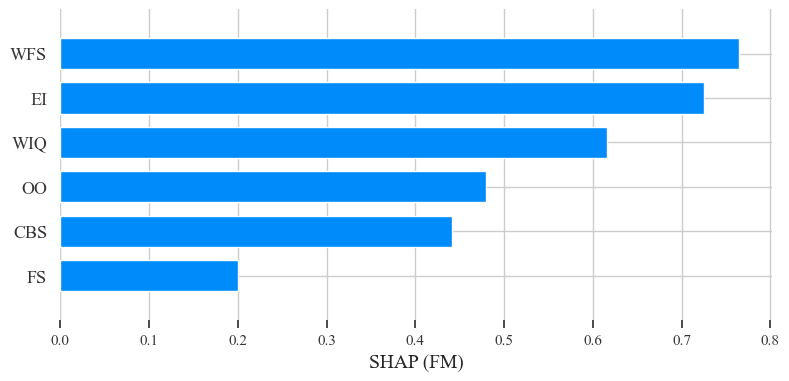

In [36]:
shap.summary_plot(shap_main_2d, X_test, plot_type="bar", feature_names=X_test.columns,show=False)
plt.xlabel("SHAP (FM)", fontsize=14)
# 设置所有字体为 Times New Roman
plt.xticks(fontname="Times New Roman")
plt.yticks(fontname="Times New Roman")
plt.savefig(r'D:\论文数据\2025.2 出口选择\图片\FM02.png', dpi=300)
plt.show()
plt.close()

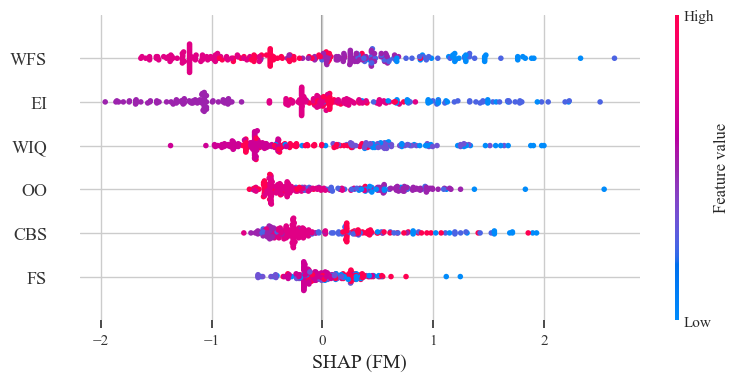

In [37]:
shap.summary_plot(shap_main_2d, X_test, feature_names=X_test.columns,show=False)
plt.xlabel("SHAP (FM)", fontsize=14)
# 设置所有字体为 Times New Roman
plt.xticks(fontname="Times New Roman")
plt.yticks(fontname="Times New Roman")
plt.savefig(r'D:\论文数据\2025.2 出口选择\图片\FM03.png', dpi=300)
plt.show()
plt.close()

<span style="font-size:30px; color:red">FI</span>

 99%|===================| 1362/1380 [00:13<00:00]        

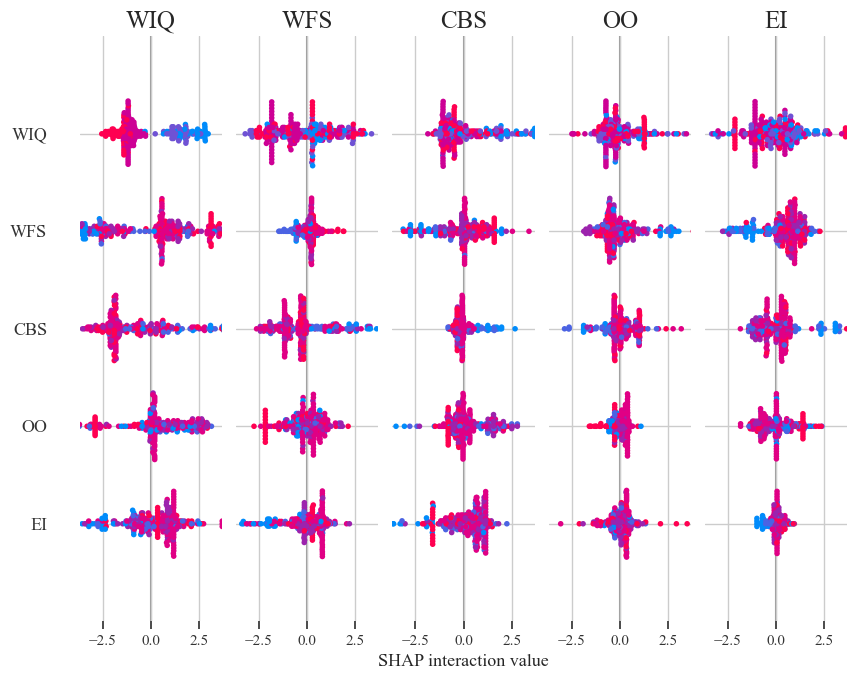

In [38]:
X = df[Best_front_vars]
y = df['FI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model04 = xgb.XGBClassifier()
model04.fit(X_train, y_train)
explainer = shap.Explainer(model04, X_train)
shap_values = explainer(X_test)

# 显式传递特征名称
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns,show=False)
plt.savefig(r'D:\论文数据\2025.2 出口选择\图片\FI01.png', dpi=300)
plt.show()
plt.close()

In [39]:
# 直接提取每个类别的主效应值（形状：5×276×22）
class_shap_main = [shap_values[:, :, i] for i in range(5)]

# 验证类别0的主效应值
shap_main_2d = class_shap_main[0]
print(shap_main_2d.shape)  # 输出 (276,22)

(276, 6)


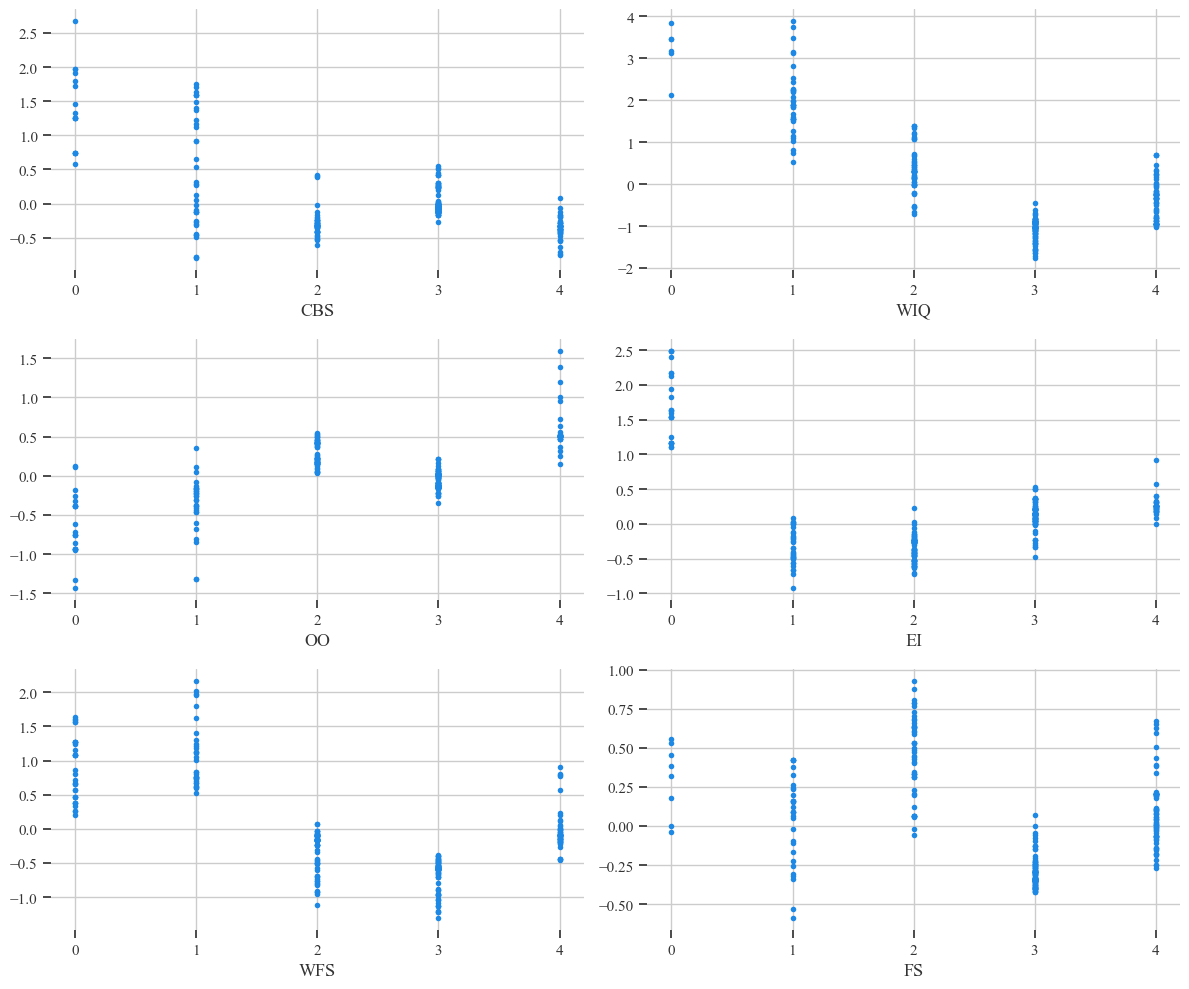

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()  # 将 axes 数组展平成一维

# 遍历每个特征进行绘图
for i, feature in enumerate(Best_front_vars):
    ax = axes[i]
    shap.dependence_plot(feature, shap_main_2d.values, X_test,interaction_index=None, ax=ax, show=False)

    # 只保留 X 轴整数刻度
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # 只显示 X 轴标签，不显示 Y 轴标签
    ax.set_ylabel("")  
    ax.set_xlabel(feature)  # 设置 X 轴标签为特征名称

# 调整布局
plt.tight_layout()
plt.savefig(r'D:\论文数据\2025.2 出口选择\图片\FI_dependence_all.png', dpi=300)
plt.show()

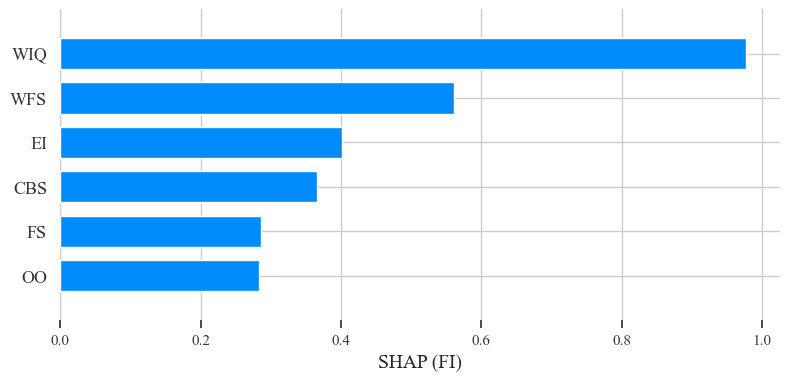

In [41]:
shap.summary_plot(shap_main_2d, X_test, plot_type="bar", feature_names=X_test.columns,show=False)
plt.xlabel("SHAP (FI)", fontsize=14)
# 设置所有字体为 Times New Roman
plt.xticks(fontname="Times New Roman")
plt.yticks(fontname="Times New Roman")
plt.savefig(r'D:\论文数据\2025.2 出口选择\图片\FI02.png', dpi=300)
plt.show()
plt.close()

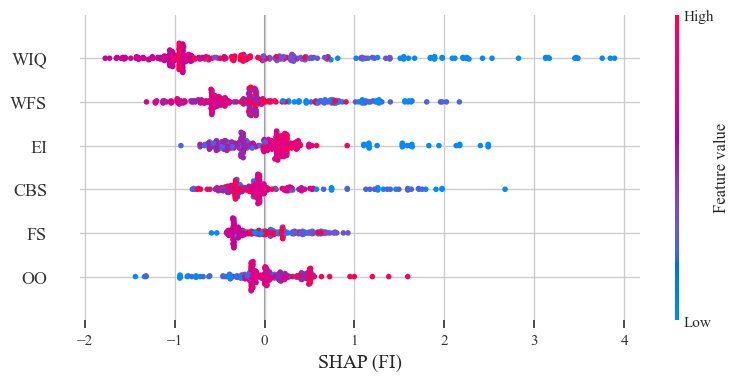

In [42]:
shap.summary_plot(shap_main_2d, X_test, feature_names=X_test.columns,show=False)
plt.xlabel("SHAP (FI)", fontsize=14)
# 设置所有字体为 Times New Roman
plt.xticks(fontname="Times New Roman")
plt.yticks(fontname="Times New Roman")
plt.savefig(r'D:\论文数据\2025.2 出口选择\图片\FI03.png', dpi=300)
plt.show()
plt.close()

<span style="font-size:30px; color:red">FE</span>

 93%|=================== | 1283/1380 [00:12<00:00]       

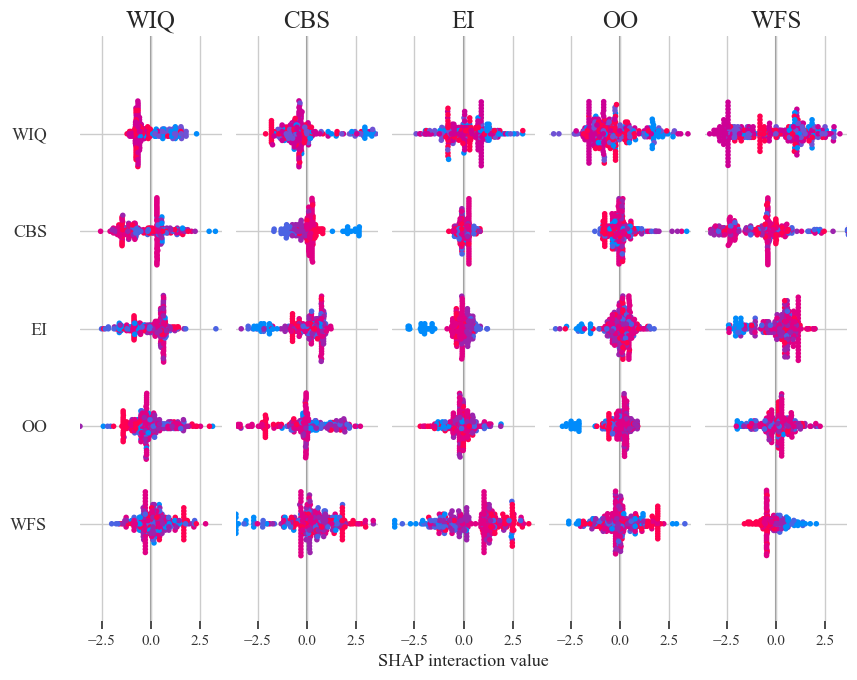

In [43]:
X = df[Best_front_vars]
y = df['FE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model05 = xgb.XGBClassifier()
model05.fit(X_train, y_train)
explainer = shap.Explainer(model05, X_train)
shap_values = explainer(X_test)

# 显式传递特征名称
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns,show=False)
plt.savefig(r'D:\论文数据\2025.2 出口选择\图片\FE01.png', dpi=300)
plt.show()
plt.close()

In [44]:
# 直接提取每个类别的主效应值（形状：5×276×22）
class_shap_main = [shap_values[:, :, i] for i in range(5)]

# 验证类别0的主效应值
shap_main_2d = class_shap_main[0]
print(shap_main_2d.shape)  # 输出 (276,22)

(276, 6)


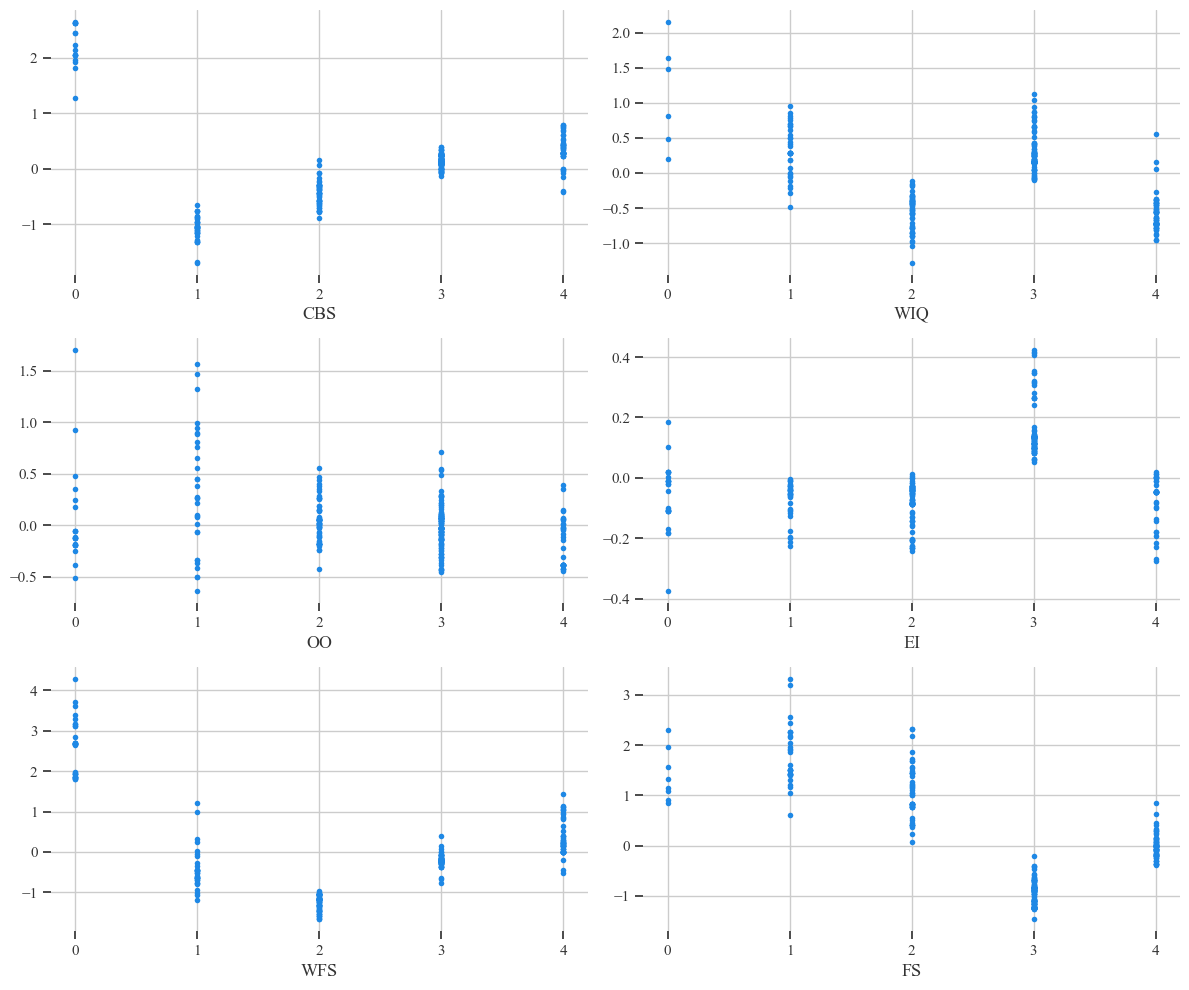

In [45]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()  # 将 axes 数组展平成一维

# 遍历每个特征进行绘图
for i, feature in enumerate(Best_front_vars):
    ax = axes[i]
    shap.dependence_plot(feature, shap_main_2d.values, X_test,interaction_index=None, ax=ax, show=False)

    # 只保留 X 轴整数刻度
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # 只显示 X 轴标签，不显示 Y 轴标签
    ax.set_ylabel("")  
    ax.set_xlabel(feature)  # 设置 X 轴标签为特征名称

# 调整布局
plt.tight_layout()
plt.savefig(r'D:\论文数据\2025.2 出口选择\图片\FE_dependence_all.png', dpi=300)
plt.show()

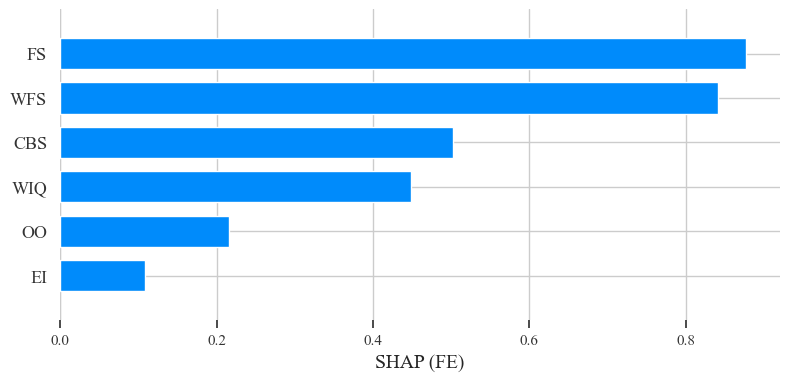

In [46]:
shap.summary_plot(shap_main_2d, X_test, plot_type="bar", feature_names=X_test.columns,show=False)
plt.xlabel("SHAP (FE)", fontsize=14)
# 设置所有字体为 Times New Roman
plt.xticks(fontname="Times New Roman")
plt.yticks(fontname="Times New Roman")
plt.savefig(r'D:\论文数据\2025.2 出口选择\图片\FE02.png', dpi=300)
plt.show()
plt.close()

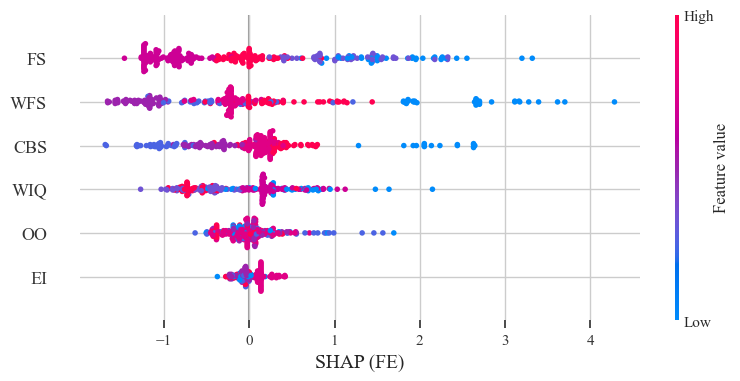

In [47]:
shap.summary_plot(shap_main_2d, X_test, feature_names=X_test.columns,show=False)
plt.xlabel("SHAP (FE)", fontsize=14)
# 设置所有字体为 Times New Roman
plt.xticks(fontname="Times New Roman")
plt.yticks(fontname="Times New Roman")
plt.savefig(r'D:\论文数据\2025.2 出口选择\图片\FE03.png', dpi=300)
plt.show()
plt.close()

# 2.0 基于机器学习特征选则

<span style="font-size:30px; color:green">以NE为例，front_vars_15 SVR </span>

In [25]:
exit_var = 'NE'
front_vars_15 = ['CBS', 'WIQ', 'OO', 'EI', 'WFS', 'FS', 'FOE', 'PF', 'RFV', 'FC', 'RFF', 'PDF', 'HO', 'OtO', 'GS']
Best_front_vars=front_vars_15

In [17]:
# 选择基础特征
features_base = df.drop(columns=exit_vars + Best_front_vars).columns.tolist()

In [27]:


# SVR 回归模型
svr_learner = SVR()

# 超参数搜索空间
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf']
}

# K-Fold 交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=2606)

# 结果保存路径
output_dir = r"D:\论文数据\2025.2 出口选择\因素分析"
os.makedirs(output_dir, exist_ok=True)

# 存储结果
results = []

# 只研究 exit_vars 中的 'NE'
exit_var = 'NE'

for best_front_var in Best_front_vars:
    print(f"\n======== 研究 {best_front_var} 对出口选择的影响 ========")
    
    # 超参数优化（使用 'NE' 作为目标变量进行搜索）
    grid_search = GridSearchCV(svr_learner, param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(df[features_base + [best_front_var]], df[exit_var])
    
    # 输出最佳超参数
    best_params = grid_search.best_params_
    print(f"最佳超参数: {best_params}")
    
    # 使用优化后的模型
    ml_l = clone(grid_search.best_estimator_)
    ml_m = clone(grid_search.best_estimator_)

    print(f"\n因果推断分析: {best_front_var} → {exit_var}")
    print("使用的模型: SVR")

    # DoubleML 数据初始化
    data_dml = dml.DoubleMLData(df, y_col=exit_var, d_cols=best_front_var, x_cols=features_base)

    # DoubleMLPLR 模型
    dml_plr = dml.DoubleMLPLR(data_dml, ml_l, ml_m)

    # 进行因果效应估计
    dml_plr.fit()

    # 提取因果效应估计值
    summary = dml_plr.summary
    print(summary)

    # 5-Fold 交叉验证评估模型性能
    scores = cross_val_score(ml_l, df[features_base + [best_front_var]], df[exit_var], cv=kf, scoring='neg_mean_squared_error')
    mse_mean = np.abs(scores.mean())
    mse_std = scores.std()

    print(f"{exit_var} 的 5-Fold 交叉验证均方误差 (MSE): {mse_mean:.4f}")
    print(f"{exit_var} 的 5-Fold 交叉验证标准差: {mse_std:.4f}")

    # 存储结果
    results.append({
        'Best_Front_Var': best_front_var,
        'Exit_Var': exit_var,
        'Effect_Estimate': summary['coef'].iloc[0],  # 提取估计的因果效应
        'Std_Error': summary['std err'].iloc[0],   # 标准误差
        'P>|t|': summary['P>|t|'].iloc[0],  # P 值
        'MSE_Mean': mse_mean,
        'MSE_Std': mse_std
    })
# 保存结果到 CSV 文件
results_df = pd.DataFrame(results)
output_path = os.path.join(output_dir, "特征选择+因果推断结果_NE.csv")
results_df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"\n所有结果已保存至 {output_path}")


======== 研究 CBS 对出口选择的影响 ========
最佳超参数: {'C': 1, 'epsilon': 0.2, 'kernel': 'rbf'}

因果推断分析: CBS → NE
使用的模型: SVR
         coef  std err          t         P>|t|     2.5 %    97.5 %
CBS  0.570728  0.02704  21.106515  6.929807e-99  0.517729  0.623726
NE 的 5-Fold 交叉验证均方误差 (MSE): 0.6779
NE 的 5-Fold 交叉验证标准差: 0.0598

======== 研究 WIQ 对出口选择的影响 ========
最佳超参数: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}

因果推断分析: WIQ → NE
使用的模型: SVR
         coef   std err         t         P>|t|     2.5 %    97.5 %
WIQ  0.294935  0.033038  8.927227  4.368215e-19  0.230183  0.359688
NE 的 5-Fold 交叉验证均方误差 (MSE): 0.9330
NE 的 5-Fold 交叉验证标准差: 0.0894

======== 研究 OO 对出口选择的影响 ========
最佳超参数: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}

因果推断分析: OO → NE
使用的模型: SVR
        coef   std err          t         P>|t|     2.5 %    97.5 %
OO  0.464974  0.028193  16.492727  4.138417e-61  0.409718  0.520231
NE 的 5-Fold 交叉验证均方误差 (MSE): 0.7807
NE 的 5-Fold 交叉验证标准差: 0.0623

======== 研究 EI 对出口选择的影响 ========
最佳超参数: {'C': 1, 'epsilon': 0.2, 

y_col是研究的变量，d_cols是处理变量，也就是对y_col会产生影响的变量。
在没有处理的情况下，d_cols 应该不受其他未被控制的因素（例如其他变量或潜在混淆因素）的影响。

<span style="font-size:30px; color:green">DML</span>

# 2.1 PLR 部分线性回归模型部分线性回归模型

<span style="font-size:20px; color:red">研究：模型选优</span> 

In [50]:
#print(data_dml_base)

In [10]:
# 设置基本模型：为数据后端指定变量
#features_base = df.drop(columns=['CBS', 'NE', 'FE', 'FM', 'FI']).columns.tolist()

'''# Initialize DoubleMLData （DoubleML的数据后端）
data_dml_base = dml.DoubleMLData(df,
                                 y_col='NE',
                                 d_cols='CBS',
                                 x_cols=features_base)'''

"# Initialize DoubleMLData （DoubleML的数据后端）\ndata_dml_base = dml.DoubleMLData(df,\n                                 y_col='NE',\n                                 d_cols='CBS',\n                                 x_cols=features_base)"

In [11]:
df[exit_vars].var()

Choose the nearest exit          1.181314
Choose the most familiar exit    1.102405
Follow the majority              1.079452
Follow the evaouation guide      1.226659
dtype: float64

In [25]:
Best_front_vars=['Proactive confirmation', 'Queuing patiently', "Observe others' movements", 'Escape immediately', 'Waiting for staff confirmation', 'Obeying the crew', 'Self-Finding other exits', 'Squeezing forward', 'Return if family left']

In [13]:
# 获取基础特征
features_base = df.drop(columns=exit_vars + Best_front_vars).columns.tolist()

# 定义 SVR 模型
svr_learner = SVR()

# 超参数搜索空间
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf']
}

# K-Fold 交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=2606)

# 结果保存路径
output_dir = r"D:\论文数据\2025.2 出口选择\因素分析"
os.makedirs(output_dir, exist_ok=True)

# 存储结果
results = []

# 遍历每个前部变量（Best_front_vars）
for best_front_var in Best_front_vars:
    print(f"\n======== 研究 {best_front_var} 对出口选择的影响 ========")
    
    # 超参数优化（使用第一个后部变量进行搜索）
    grid_search = GridSearchCV(svr_learner, param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(df[features_base + [best_front_var]], df[exit_vars[0]])
    
    # 输出最佳超参数
    best_params = grid_search.best_params_
    print(f"最佳超参数: {best_params}")
    
    # 使用优化后的模型
    ml_l = clone(grid_search.best_estimator_)
    ml_m = clone(grid_search.best_estimator_)

    for exit_var in exit_vars:
        print(f"\n因果推断分析: {best_front_var} → {exit_var}")
        print("使用的模型: SVR")

        # DoubleML 数据初始化
        data_dml = dml.DoubleMLData(df, y_col=exit_var, d_cols=best_front_var, x_cols=features_base)

        # DoubleMLPLR 模型
        dml_plr = dml.DoubleMLPLR(data_dml, ml_l, ml_m)

        # 进行因果效应估计
        dml_plr.fit()

        # 提取因果效应估计值
        summary = dml_plr.summary
        print(summary)

        # 5-Fold 交叉验证评估模型性能
        scores = cross_val_score(ml_l, df[features_base + [best_front_var]], df[exit_var], cv=kf, scoring='neg_mean_squared_error')
        mse_mean = np.abs(scores.mean())
        rmse_mean = np.sqrt(mse_mean)  # 计算 RMSE
        mse_std = scores.std()

        print(f"{exit_var} 的 5-Fold 交叉验证均方根误差 (RMSE): {rmse_mean:.4f}")
        print(f"{exit_var} 的 5-Fold 交叉验证标准差: {mse_std:.4f}")

        # 存储结果
        results.append({
            'Best_Front_Var': best_front_var,
            'Exit_Var': exit_var,
            'Effect_Estimate': summary['coef'].iloc[0],  # 估计的因果效应
            'Std_Error': summary['std err'].iloc[0],   # 标准误差
            'P>|t|': summary['P>|t|'].iloc[0],  # P 值
            'RMSE_Mean': rmse_mean,
            'MSE_Std': mse_std,
            'C': best_params['C'],
            'Epsilon': best_params['epsilon'],
            'Kernel': best_params['kernel']
        })

# 保存结果到 CSV 文件
results_df = pd.DataFrame(results)
output_path = os.path.join(output_dir, "因果推断结果_SVR.csv")
results_df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"\n所有结果已保存至 {output_path}")


======== 研究 Proactive confirmation 对出口选择的影响 ========
最佳超参数: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}

因果推断分析: Proactive confirmation → Choose the nearest exit
使用的模型: SVR
                            coef   std err          t         P>|t|     2.5 %  \
Proactive confirmation  0.509019  0.029095  17.495202  1.558602e-68  0.451994   

                          97.5 %  
Proactive confirmation  0.566043  
Choose the nearest exit 的 5-Fold 交叉验证均方根误差 (RMSE): 0.8040
Choose the nearest exit 的 5-Fold 交叉验证标准差: 0.0377

因果推断分析: Proactive confirmation → Choose the most familiar exit
使用的模型: SVR
                            coef   std err          t         P>|t|     2.5 %  \
Proactive confirmation  0.334066  0.030492  10.955909  6.225048e-28  0.274303   

                          97.5 %  
Proactive confirmation  0.393828  
Choose the most familiar exit 的 5-Fold 交叉验证均方根误差 (RMSE): 0.8033
Choose the most familiar exit 的 5-Fold 交叉验证标准差: 0.0780

因果推断分析: Proactive confirmation → Follow the majority
使用的模型: 

In [14]:
# 获取基础特征
features_base = df.drop(columns=exit_vars + Best_front_vars).columns.tolist()

# 线性回归模型
lr_learner = LinearRegression()

# K-Fold 交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=2606)

# 结果保存路径
output_dir = r"D:\论文数据\2025.2 出口选择\因素分析"
os.makedirs(output_dir, exist_ok=True)

# 存储结果
results = []

# 遍历每个前部变量（Best_front_vars）
for best_front_var in Best_front_vars:
    print(f"\n======== 研究 {best_front_var} 对出口选择的影响 ========")
    
    # 使用线性回归模型进行因果推断分析
    for exit_var in exit_vars:
        print(f"\n因果推断分析: {best_front_var} → {exit_var}")
        print("使用的模型: Linear Regression")

        # DoubleML 数据初始化
        data_dml = dml.DoubleMLData(df, y_col=exit_var, d_cols=best_front_var, x_cols=features_base)

        # 使用线性回归模型进行因果推断
        ml_l = clone(lr_learner)
        ml_m = clone(lr_learner)

        # DoubleMLPLR 模型
        dml_plr = dml.DoubleMLPLR(data_dml, ml_l, ml_m)

        # 进行因果效应估计
        dml_plr.fit()

        # 提取因果效应估计值
        summary = dml_plr.summary
        print(summary)

        # 5-Fold 交叉验证评估模型性能
        scores = cross_val_score(lr_learner, df[features_base + [best_front_var]], df[exit_var], cv=kf, scoring='neg_mean_squared_error')
        mse_mean = np.abs(scores.mean())
        rmse_mean = np.sqrt(mse_mean)  # 计算 RMSE
        mse_std = scores.std()

        print(f"{exit_var} 的 5-Fold 交叉验证均方根误差 (RMSE): {rmse_mean:.4f}")
        print(f"{exit_var} 的 5-Fold 交叉验证标准差: {mse_std:.4f}")

        # 存储结果
        results.append({
            'Best_Front_Var': best_front_var,
            'Exit_Var': exit_var,
            'Effect_Estimate': summary['coef'].iloc[0],  # 估计的因果效应
            'Std_Error': summary['std err'].iloc[0],   # 标准误差
            'P>|t|': summary['P>|t|'].iloc[0],  # P 值
            'RMSE_Mean': rmse_mean,
            'MSE_Std': mse_std
        })

# 保存结果到 CSV 文件
results_df = pd.DataFrame(results)
output_path = os.path.join(output_dir, "因果推断结果_LR.csv")
results_df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"\n所有结果已保存至 {output_path}")


======== 研究 Proactive confirmation 对出口选择的影响 ========

因果推断分析: Proactive confirmation → Choose the nearest exit
使用的模型: Linear Regression
                            coef   std err          t          P>|t|  \
Proactive confirmation  0.570169  0.026272  21.702322  1.950589e-104   

                           2.5 %    97.5 %  
Proactive confirmation  0.518676  0.621662  
Choose the nearest exit 的 5-Fold 交叉验证均方根误差 (RMSE): 0.8378
Choose the nearest exit 的 5-Fold 交叉验证标准差: 0.0501

因果推断分析: Proactive confirmation → Choose the most familiar exit
使用的模型: Linear Regression
                            coef  std err          t         P>|t|     2.5 %  \
Proactive confirmation  0.424969  0.02685  15.827753  2.002440e-56  0.372345   

                          97.5 %  
Proactive confirmation  0.477594  
Choose the most familiar exit 的 5-Fold 交叉验证均方根误差 (RMSE): 0.8545
Choose the most familiar exit 的 5-Fold 交叉验证标准差: 0.0867

因果推断分析: Proactive confirmation → Follow the majority
使用的模型: Linear Regression
   

In [44]:
# 获取基础特征
features_base = df.drop(columns=exit_vars + Best_front_vars).columns.tolist()

# 定义随机森林回归模型
rf_learner = RandomForestRegressor(random_state=2606, n_jobs=-1)

# 超参数搜索空间
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# K-Fold 交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=2606)

# 结果保存路径
output_dir = r"D:\论文数据\2025.2 出口选择\因素分析"
os.makedirs(output_dir, exist_ok=True)

# 存储结果
results = []

# 遍历每个前部变量（Best_front_vars）
for best_front_var in Best_front_vars:
    print(f"\n======== 研究 {best_front_var} 对出口选择的影响 ========")
    
    # 超参数优化（使用第一个后部变量进行搜索）
    grid_search = GridSearchCV(rf_learner, param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(df[features_base + [best_front_var]], df[exit_vars[0]])
    
    # 输出最佳超参数
    best_params = grid_search.best_params_
    print(f"最佳超参数: {best_params}")
    
    # 使用优化后的模型
    ml_l = clone(grid_search.best_estimator_)
    ml_m = clone(grid_search.best_estimator_)

    for exit_var in exit_vars:
        print(f"\n因果推断分析: {best_front_var} → {exit_var}")
        print("使用的模型: RF")

        # DoubleML 数据初始化
        data_dml = dml.DoubleMLData(df, y_col=exit_var, d_cols=best_front_var, x_cols=features_base)

        # DoubleMLPLR 模型
        dml_plr = dml.DoubleMLPLR(data_dml, ml_l, ml_m)

        # 进行因果效应估计
        dml_plr.fit()

        # 提取因果效应估计值
        summary = dml_plr.summary
        print(summary)

        # 5-Fold 交叉验证评估模型性能
        scores = cross_val_score(ml_l, df[features_base + [best_front_var]], df[exit_var], cv=kf, scoring='neg_mean_squared_error')
        mse_mean = np.abs(scores.mean())
        rmse_mean = np.sqrt(mse_mean)  # 计算 RMSE
        mse_std = scores.std()

        print(f"{exit_var} 的 5-Fold 交叉验证均方根误差 (RMSE): {rmse_mean:.4f}")
        print(f"{exit_var} 的 5-Fold 交叉验证标准差: {mse_std:.4f}")

        # 存储结果
        results.append({
            'Best_Front_Var': best_front_var,
            'Exit_Var': exit_var,
            'Effect_Estimate': summary['coef'].iloc[0],  # 估计的因果效应
            'Std_Error': summary['std err'].iloc[0],   # 标准误差
            'P>|t|': summary['P>|t|'].iloc[0],  # P 值
            'RMSE_Mean': rmse_mean,
            'MSE_Std': mse_std,
            'n_estimators': best_params['n_estimators'],
            'max_depth': best_params['max_depth'],
            'min_samples_split': best_params['min_samples_split']
        })

# ------------------- 安慰剂检验：处理变量打乱（假处理 Placebo Treatment） -------------------
placebo_treatment_results = []

for best_front_var in Best_front_vars:
    print(f"\n======== 安慰剂检验（假处理）：打乱 {best_front_var}，分析对出口选择影响 ========")
    
    # 生成假处理列（打乱 best_front_var）
    df_placebo = copy.deepcopy(df)
    df_placebo[f"Placebo_{best_front_var}"] = np.random.permutation(df_placebo[best_front_var].values)
    
    # 使用之前搜索到的最佳超参数
    ml_l_placebo = RandomForestRegressor(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split'],
        random_state=2606,
        n_jobs=-1
    )
    ml_m_placebo = clone(ml_l_placebo)

    for exit_var in exit_vars:
        print(f"安慰剂：{best_front_var}（打乱版） → {exit_var}")

        # DoubleML 数据初始化
        data_dml_placebo = dml.DoubleMLData(df_placebo, y_col=exit_var, d_cols=f"Placebo_{best_front_var}", x_cols=features_base)

        # DoubleMLPLR 模型
        dml_plr_placebo = dml.DoubleMLPLR(data_dml_placebo, ml_l_placebo, ml_m_placebo)

        # 拟合
        dml_plr_placebo.fit()

        # 提取结果
        summary_placebo = dml_plr_placebo.summary

        placebo_treatment_results.append({
            'Best_Front_Var': f"Placebo_{best_front_var}",
            'Exit_Var': exit_var,
            'Effect_Estimate': summary_placebo['coef'].iloc[0],
            'Std_Error': summary_placebo['std err'].iloc[0],
            'P>|t|': summary_placebo['P>|t|'].iloc[0],
            'Group': 'Placebo Treatment'
        })

# ------------------- 安慰剂检验：结果变量打乱（假结果 Placebo Outcome） -------------------
placebo_outcome_results = []

for best_front_var in Best_front_vars:
    print(f"\n======== 安慰剂检验（假结果）：打乱出口变量，真实 {best_front_var} ========")

    for exit_var in exit_vars:
        # 打乱出口选择变量
        df_placebo_y = copy.deepcopy(df)
        df_placebo_y[f"Shuffled_{exit_var}"] = np.random.permutation(df_placebo_y[exit_var].values)

        # 使用之前搜索到的最佳超参数
        ml_l_placebo_y = RandomForestRegressor(
            n_estimators=best_params['n_estimators'],
            max_depth=best_params['max_depth'],
            min_samples_split=best_params['min_samples_split'],
            random_state=2606,
            n_jobs=-1
        )
        ml_m_placebo_y = clone(ml_l_placebo_y)

        print(f"安慰剂：真实 {best_front_var} → {exit_var}（打乱版）")

        # DoubleML 数据初始化
        data_dml_placebo_y = dml.DoubleMLData(df_placebo_y, y_col=f"Shuffled_{exit_var}", d_cols=best_front_var, x_cols=features_base)

        # DoubleMLPLR 模型
        dml_plr_placebo_y = dml.DoubleMLPLR(data_dml_placebo_y, ml_l_placebo_y, ml_m_placebo_y)

        # 拟合
        dml_plr_placebo_y.fit()

        # 提取结果
        summary_placebo_y = dml_plr_placebo_y.summary

        placebo_outcome_results.append({
            'Best_Front_Var': best_front_var,
            'Exit_Var': f"Shuffled_{exit_var}",
            'Effect_Estimate': summary_placebo_y['coef'].iloc[0],
            'Std_Error': summary_placebo_y['std err'].iloc[0],
            'P>|t|': summary_placebo_y['P>|t|'].iloc[0],
            'Group': 'Placebo Outcome'
        })

# ------------------- 汇总所有结果：真实 + 安慰剂 -------------------
# 原始真实推断 results 里面补充 Group列
for r in results:
    r['Group'] = 'Real'

# 合并所有结果
all_results = results + placebo_treatment_results + placebo_outcome_results

# 转为DataFrame
all_results_df = pd.DataFrame(all_results)

# 保存全部结果
all_output_path = os.path.join(output_dir, "因果推断结果_含安慰剂_RF.csv")
all_results_df.to_csv(all_output_path, index=False, encoding='utf-8-sig')

print(f"\n所有真实与安慰剂检验结果已保存至 {all_output_path}")


======== 研究 Proactive confirmation 对出口选择的影响 ========
最佳超参数: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

因果推断分析: Proactive confirmation → Choose the nearest exit
使用的模型: RF
                            coef   std err          t         P>|t|     2.5 %  \
Proactive confirmation  0.466092  0.030693  15.185835  4.389400e-52  0.405936   

                          97.5 %  
Proactive confirmation  0.526249  
Choose the nearest exit 的 5-Fold 交叉验证均方根误差 (RMSE): 0.7911
Choose the nearest exit 的 5-Fold 交叉验证标准差: 0.0265

因果推断分析: Proactive confirmation → Choose the most familiar exit
使用的模型: RF
                            coef   std err          t         P>|t|     2.5 %  \
Proactive confirmation  0.325659  0.030893  10.541368  5.568299e-26  0.265109   

                          97.5 %  
Proactive confirmation  0.386209  
Choose the most familiar exit 的 5-Fold 交叉验证均方根误差 (RMSE): 0.7979
Choose the most familiar exit 的 5-Fold 交叉验证标准差: 0.0795

因果推断分析: Proactive confirmation → Follow t

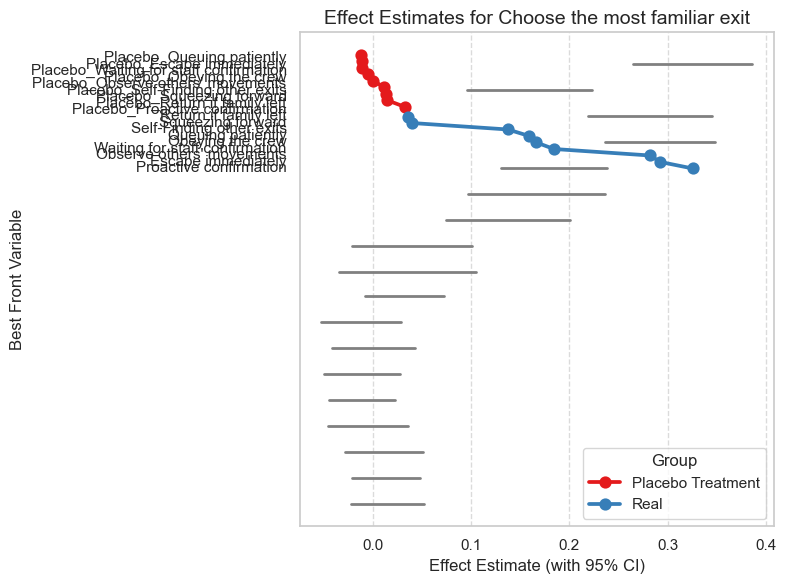

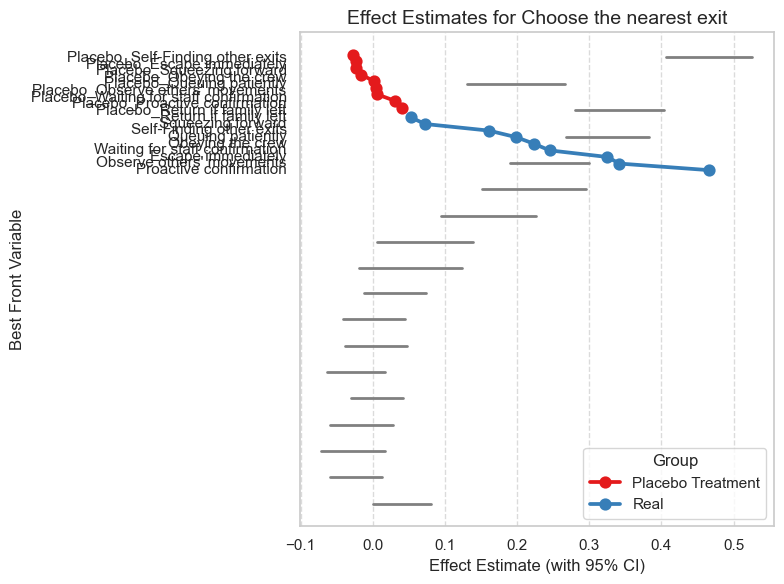

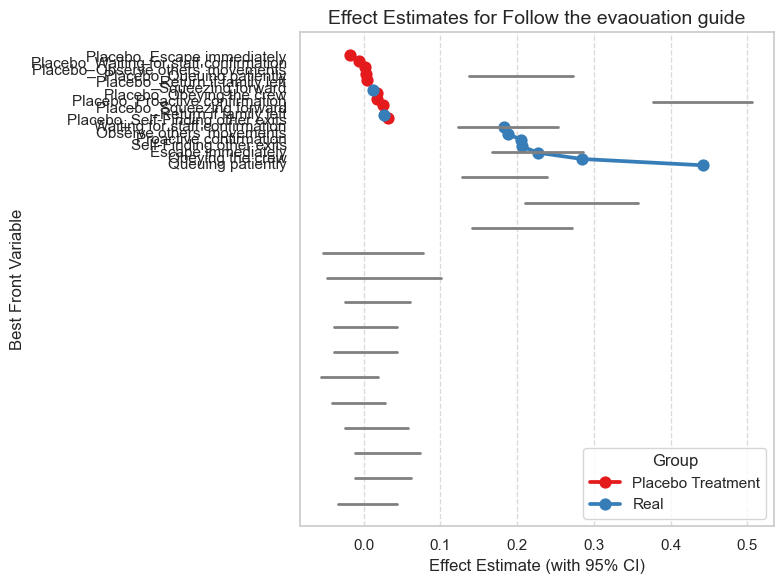

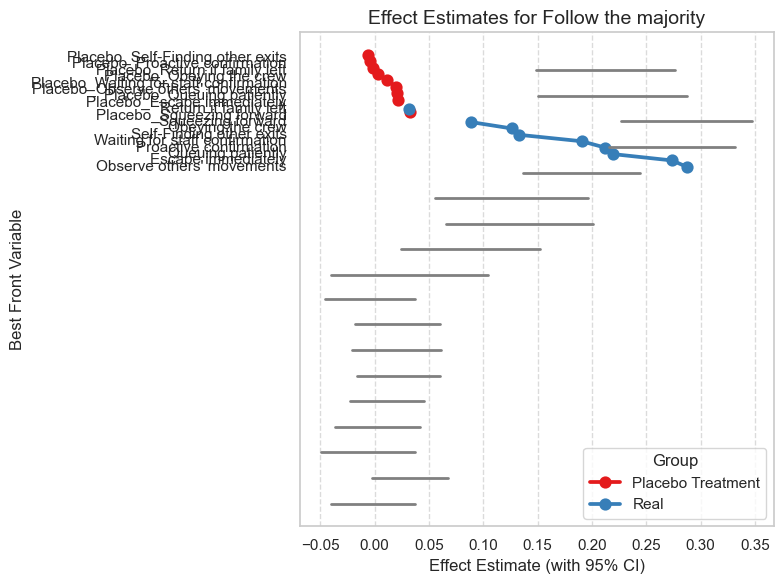

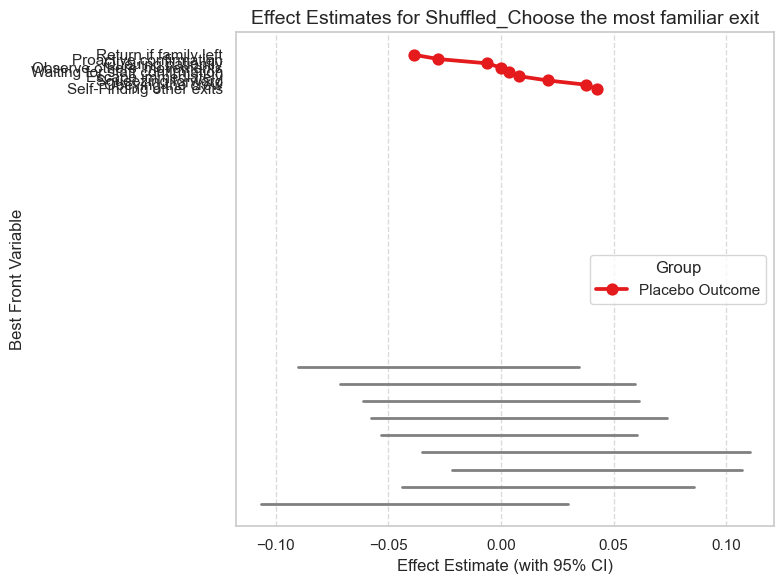

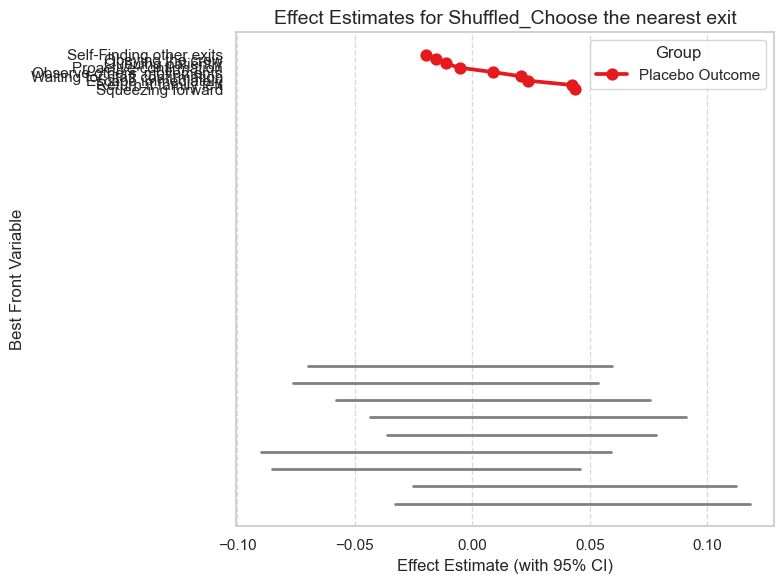

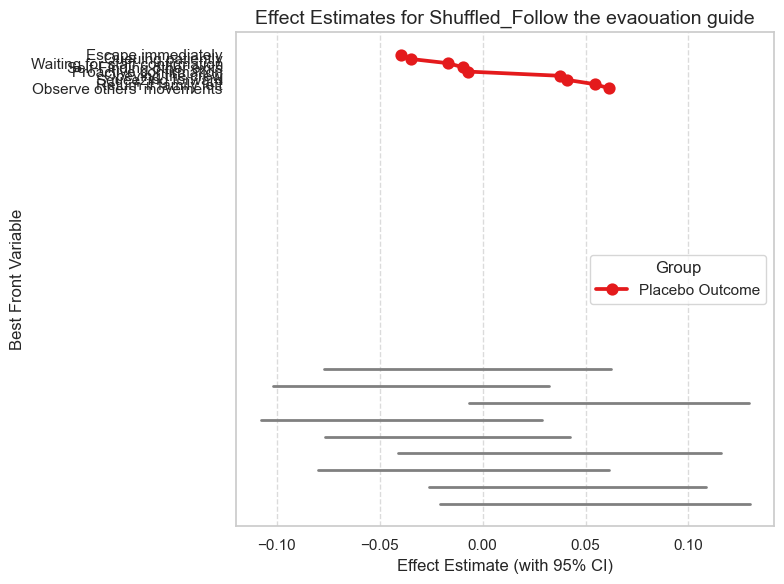

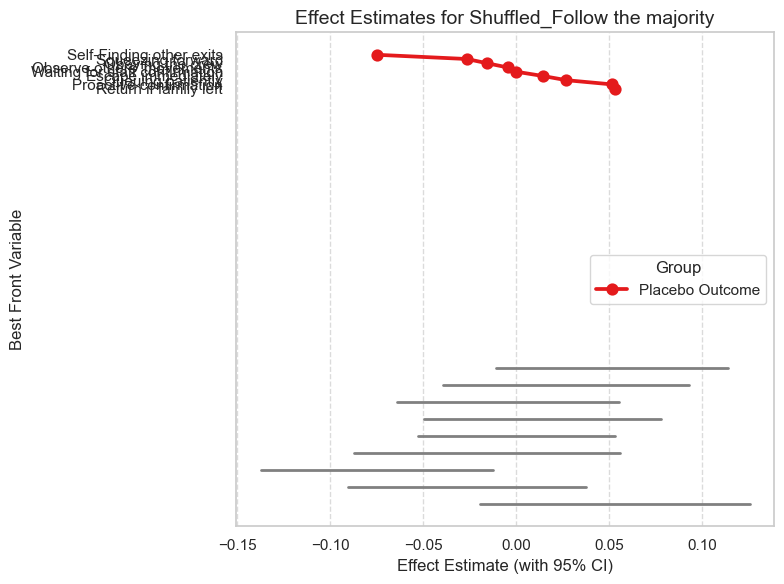

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取你的数据
results_df = pd.read_csv(r"D:\论文数据\2025.2 出口选择\因素分析\因果推断结果_含安慰剂_RF.csv")

# 添加新的CI列
results_df['CI_Lower'] = results_df['Effect_Estimate'] - 1.96 * results_df['Std_Error']
results_df['CI_Upper'] = results_df['Effect_Estimate'] + 1.96 * results_df['Std_Error']

# 按出口选择（Exit_Var）分组画图
for exit_var, subset in results_df.groupby('Exit_Var'):

    subset = subset.sort_values('Effect_Estimate', ascending=True)

    n_hue_levels = subset['Group'].nunique()

    plt.figure(figsize=(8, 6))
    
    sns.pointplot(
        data=subset,
        y='Best_Front_Var',
        x='Effect_Estimate',
        hue='Group',
        dodge=0.5 if n_hue_levels > 1 else 0,
        palette='Set1',
        markers='o',
        errorbar=None  # 不让seaborn自动画误差线
    )

    # 自己手动加误差线
    for idx, row in subset.iterrows():
        group_offset = 0
        if n_hue_levels > 1:
            group_offset = -0.15 if row['Group'] == subset['Group'].unique()[0] else 0.15

        plt.plot(
            [row['CI_Lower'], row['CI_Upper']],
            [idx + group_offset, idx + group_offset],
            color='gray',
            lw=2
        )

    plt.title(f"Effect Estimates for {exit_var}", fontsize=14)
    plt.xlabel("Effect Estimate (with 95% CI)")
    plt.ylabel("Best Front Variable")

    plt.legend(title='Group')

    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [16]:
# 获取基础特征
features_base = df.drop(columns=exit_vars + Best_front_vars).columns.tolist()

# 定义 KNN 回归模型
knn_learner = KNeighborsRegressor()

# 超参数搜索空间
param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# K-Fold 交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=2606)

# 结果保存路径
output_dir = r"D:\论文数据\2025.2 出口选择\因素分析"
os.makedirs(output_dir, exist_ok=True)

# 存储结果
results = []

# 遍历每个前部变量（Best_front_vars）
for best_front_var in Best_front_vars:
    print(f"\n======== 研究 {best_front_var} 对出口选择的影响 ========")
    
    # 超参数优化（使用第一个后部变量进行搜索）
    grid_search = GridSearchCV(knn_learner, param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(df[features_base + [best_front_var]], df[exit_vars[0]])
    
    # 输出最佳超参数
    best_params = grid_search.best_params_
    print(f"最佳超参数: {best_params}")
    
    # 使用优化后的模型
    ml_l = clone(grid_search.best_estimator_)
    ml_m = clone(grid_search.best_estimator_)

    for exit_var in exit_vars:
        print(f"\n因果推断分析: {best_front_var} → {exit_var}")
        print("使用的模型: KNN")

        # DoubleML 数据初始化
        data_dml = dml.DoubleMLData(df, y_col=exit_var, d_cols=best_front_var, x_cols=features_base)

        # DoubleMLPLR 模型
        dml_plr = dml.DoubleMLPLR(data_dml, ml_l, ml_m)

        # 进行因果效应估计
        dml_plr.fit()

        # 提取因果效应估计值
        summary = dml_plr.summary
        print(summary)

        # 5-Fold 交叉验证评估模型性能
        scores = cross_val_score(ml_l, df[features_base + [best_front_var]], df[exit_var], cv=kf, scoring='neg_mean_squared_error')
        mse_mean = np.abs(scores.mean())
        rmse_mean = np.sqrt(mse_mean)  # 计算 RMSE
        mse_std = scores.std()

        print(f"{exit_var} 的 5-Fold 交叉验证均方根误差 (RMSE): {rmse_mean:.4f}")
        print(f"{exit_var} 的 5-Fold 交叉验证标准差: {mse_std:.4f}")

        # 存储结果
        results.append({
            'Best_Front_Var': best_front_var,
            'Exit_Var': exit_var,
            'Effect_Estimate': summary['coef'].iloc[0],  # 估计的因果效应
            'Std_Error': summary['std err'].iloc[0],   # 标准误差
            'P>|t|': summary['P>|t|'].iloc[0],  # P 值
            'RMSE_Mean': rmse_mean,
            'MSE_Std': mse_std,
            'n_neighbors': best_params['n_neighbors'],
            'weights': best_params['weights'],
            'metric': best_params['metric']
        })

# 保存结果到 CSV 文件
results_df = pd.DataFrame(results)
output_path = os.path.join(output_dir, "因果推断结果_KNN.csv")
results_df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"\n所有结果已保存至 {output_path}")


======== 研究 Proactive confirmation 对出口选择的影响 ========
最佳超参数: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}

因果推断分析: Proactive confirmation → Choose the nearest exit
使用的模型: KNN
                            coef   std err          t         P>|t|     2.5 %  \
Proactive confirmation  0.497252  0.030526  16.289481  1.172203e-59  0.437422   

                          97.5 %  
Proactive confirmation  0.557082  
Choose the nearest exit 的 5-Fold 交叉验证均方根误差 (RMSE): 0.8236
Choose the nearest exit 的 5-Fold 交叉验证标准差: 0.0621

因果推断分析: Proactive confirmation → Choose the most familiar exit
使用的模型: KNN
                            coef   std err          t         P>|t|     2.5 %  \
Proactive confirmation  0.340604  0.032086  10.615351  2.528414e-26  0.277717   

                          97.5 %  
Proactive confirmation  0.403491  
Choose the most familiar exit 的 5-Fold 交叉验证均方根误差 (RMSE): 0.7954
Choose the most familiar exit 的 5-Fold 交叉验证标准差: 0.0828

因果推断分析: Proactive confirmation → Fol

# 2.2 虚假检验


======== 研究 Proactive confirmation 对出口选择的影响 ========
最佳超参数: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

因果推断分析: Proactive confirmation → Choose the nearest exit
使用的模型: RF
                           coef   std err          t         P>|t|     2.5 %  \
Proactive confirmation  0.46747  0.030492  15.330845  4.757572e-53  0.407706   

                          97.5 %  
Proactive confirmation  0.527233  
Choose the nearest exit 的 5-Fold 交叉验证均方根误差 (RMSE): 0.7911
Choose the nearest exit 的 5-Fold 交叉验证标准差: 0.0265

因果推断分析: Proactive confirmation → Choose the most familiar exit
使用的模型: RF
                            coef   std err          t         P>|t|     2.5 %  \
Proactive confirmation  0.340527  0.030583  11.134387  8.532996e-29  0.280585   

                          97.5 %  
Proactive confirmation  0.400469  
Choose the most familiar exit 的 5-Fold 交叉验证均方根误差 (RMSE): 0.7979
Choose the most familiar exit 的 5-Fold 交叉验证标准差: 0.0795

因果推断分析: Proactive confirmation → Follow the

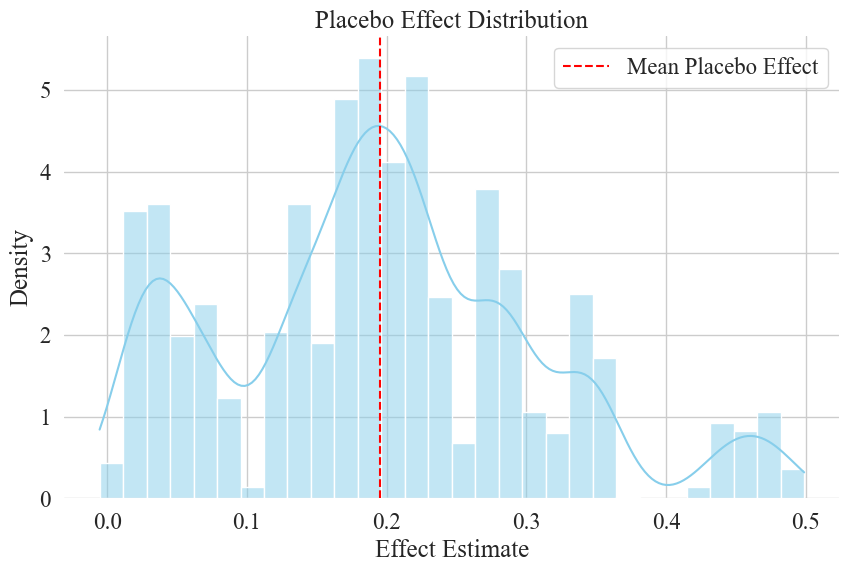


所有结果已保存至 D:\论文数据\2025.2 出口选择\因素分析\因果推断结果_RF1.csv


In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import clone
from sklearn.utils import shuffle
import doubleml as dml

# 确保数据框 `df` 已加载，并且 Best_front_vars 和 exit_vars 已定义

# 获取基础特征
features_base = df.drop(columns=exit_vars + Best_front_vars).columns.tolist()

# 定义随机森林回归模型
rf_learner = RandomForestRegressor(random_state=2606, n_jobs=-1)

# 超参数搜索空间
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# K-Fold 交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=2606)

# 结果保存路径
output_dir = r"D:\论文数据\2025.2 出口选择\因素分析"
os.makedirs(output_dir, exist_ok=True)

# 存储结果
results = []

# 存储伪效应结果
placebo_results = []

# 伪效应打乱次数
n_permutations = 100

# 遍历每个前部变量（Best_front_vars）
for best_front_var in Best_front_vars:
    print(f"\n======== 研究 {best_front_var} 对出口选择的影响 ========")
    
    # 超参数优化（使用第一个后部变量进行搜索）
    grid_search = GridSearchCV(rf_learner, param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(df[features_base + [best_front_var]], df[exit_vars[0]])
    
    # 输出最佳超参数
    best_params = grid_search.best_params_
    print(f"最佳超参数: {best_params}")
    
    # 使用优化后的模型
    ml_l = clone(grid_search.best_estimator_)
    ml_m = clone(grid_search.best_estimator_)

    for exit_var in exit_vars:
        print(f"\n因果推断分析: {best_front_var} → {exit_var}")
        print("使用的模型: RF")

        # DoubleML 数据初始化
        data_dml = dml.DoubleMLData(df, y_col=exit_var, d_cols=best_front_var, x_cols=features_base)

        # DoubleMLPLR 模型
        dml_plr = dml.DoubleMLPLR(data_dml, ml_l, ml_m)

        # 进行因果效应估计
        dml_plr.fit()

        # 提取因果效应估计值
        summary = dml_plr.summary
        print(summary)

        # 5-Fold 交叉验证评估模型性能
        scores = cross_val_score(ml_l, df[features_base + [best_front_var]], df[exit_var], cv=kf, scoring='neg_mean_squared_error')
        mse_mean = np.abs(scores.mean())
        rmse_mean = np.sqrt(mse_mean)  # 计算 RMSE
        mse_std = scores.std()

        print(f"{exit_var} 的 5-Fold 交叉验证均方根误差 (RMSE): {rmse_mean:.4f}")
        print(f"{exit_var} 的 5-Fold 交叉验证标准差: {mse_std:.4f}")

        # 存储真实效应结果
        results.append({
            'Best_Front_Var': best_front_var,
            'Exit_Var': exit_var,
            'Effect_Estimate': summary['coef'].iloc[0],  # 估计的因果效应
            'Std_Error': summary['std err'].iloc[0],   # 标准误差
            'P>|t|': summary['P>|t|'].iloc[0],  # P 值
            'RMSE_Mean': rmse_mean,
            'MSE_Std': mse_std,
            'n_estimators': best_params['n_estimators'],
            'max_depth': best_params['max_depth'],
            'min_samples_split': best_params['min_samples_split']
        })
        
        # 进行伪效应检验（打乱处理变量并重新进行估计）
        for _ in range(n_permutations):
            # 随机打乱处理变量
            df_shuffled = shuffle(df)
            shuffled_data_dml = dml.DoubleMLData(df_shuffled, y_col=exit_var, d_cols=best_front_var, x_cols=features_base)
            dml_plr_shuffled = dml.DoubleMLPLR(shuffled_data_dml, ml_l, ml_m)
            dml_plr_shuffled.fit()

            # 提取伪效应估计值
            placebo_effect = dml_plr_shuffled.summary['coef'].iloc[0]
            placebo_results.append(placebo_effect)

# 绘制伪效应分布图
plt.figure(figsize=(10, 6))
sns.histplot(placebo_results, kde=True, color='skyblue', stat='density', bins=30)
plt.axvline(x=np.mean(placebo_results), color='red', linestyle='--', label=f'Mean Placebo Effect')
plt.title('Placebo Effect Distribution')
plt.xlabel('Effect Estimate')
plt.ylabel('Density')
plt.legend()
plt.show()

# 保存结果到 CSV 文件
results_df = pd.DataFrame(results)
output_path = os.path.join(output_dir, "因果推断结果_RF1.csv")
results_df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"\n所有结果已保存至 {output_path}")


# 2.3 异质性分析

In [ ]:
'''
    '性别': 'Gen',   #
    '年龄段': 'Age',   #
    '教育程度': 'Edu',   #
    '行动能力': 'Mob',   #
    '您乘坐客船的经历（不含本次）': 'PCE',   #
    '与您一起出行的人员数量': 'GS',   #
    '接受船舶疏散教育/训练的经历': 'ET',    #                    
    '听到疏散逃生警报，您会等待工作人员确认后再行动': 'WFS',
    '听到疏散逃生警报，您会立即疏散逃生': 'EI',
    '听到疏散逃生警报，您会观察其他人的动静再行动': 'OO',
    '假如听到疏散逃生警报，您会自行开门查看确认': 'CBS',         
    '您会耐心排队等待': 'WIQ',
    '您会自行寻找其他出口': 'FOE',  
    '您会往前挤行': 'PF',
    '您会听从船员引导': 'FS',
    '贵重物品遗留，您是否会返回寻找': 'RFV',
    '家人遗留，您是否会返回寻找': 'RFF',
    '疏散过程中，您是否会协助他人进行疏散': 'HO',
    '疏散过程中，您是否会超越他人或向前挤行': 'OtO',
    '疏散逃生时，您是否会寻找同伴一起逃生': 'FC',
    '假如发生火灾，您是否会出现恐慌心理': 'PDF',
    '疏散时，您是否会携带大件行李箱': 'CL',
    '疏散时，您是否会跟从团队中的临时领导者': 'FL'
'''

In [82]:
import pandas as pd

# 读取数据
file_path = r"D:\论文数据\2025.2 出口选择\因素分析\因素分析读取表.xlsx"
df_best_params = pd.read_excel(file_path)

# 将所有数值列转换为整数
df_best_params = df_best_params.applymap(lambda x: int(x) if isinstance(x, (int, float)) else x)

# 查看结果
#print(df_best_params)


C:\Users\yuan yiquan\AppData\Local\Temp\ipykernel_4700\3947538288.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_best_params = df_best_params.applymap(lambda x: int(x) if isinstance(x, (int, float)) else x)


In [60]:
'Gen', 'Age', 'Edu', 'Mob', 'PCE', 'GS', 'ET'

('Gen', 'Age', 'Edu', 'Mob', 'PCE', 'GS', 'ET')

<span style="font-size:30px; color:blue">ATE</span>

In [ ]:
# 定义异质性研究的特征
heterogeneity_features = ['Gen', 'Age', 'Edu', 'Mob', 'PCE', 'GS', 'ET']

# 结果存储路径
output_dir = r"D:\论文数据\2025.2 出口选择\因素分析\异质性"
os.makedirs(output_dir, exist_ok=True)

# 存储结果
heterogeneity_results = []

# 进行异质性研究
for feature in heterogeneity_features:
    print(f"\n======= 研究 {feature} 对因果效应的影响 =======")
    
    # 遍历每个前部变量和目标变量
    for idx, row in df_best_params.iterrows():
        best_front_var = row['Best_Front_Var']
        exit_var = row['Exit_Var']
        model_type = row['model']
        
        # 获取超参数
        if model_type == 'RF':
            # 如果 max_depth 为 0，则设置为 None
            max_depth = row['max_depth'] if row['max_depth'] != 0 else None
            model = RandomForestRegressor(
                n_estimators=row['n_estimators'],
                max_depth=max_depth,
                min_samples_split=row['min_samples_split']
            )
        elif model_type == 'KNN':
            model = KNeighborsRegressor(
                n_neighbors=row['n_neighbors'],
                weights=row['weights'],
                metric=row['metric']
            )

        # 进行因果效应分析
        for value in df[feature].unique():  # 遍历每个特征值
            print(f"分析 {feature} = {value}")
            
            # 筛选出目标特征值的数据
            df_subset = df[df[feature] == value]
            
            # 数据初始化
            data_dml = dml.DoubleMLData(df_subset, y_col=exit_var, d_cols=best_front_var, x_cols=features_base)
            
            # 创建 DoubleMLPLR 模型
            ml_l = model
            ml_m = model
            dml_plr = dml.DoubleMLPLR(data_dml, ml_l, ml_m)

            # 进行因果效应估计
            dml_plr.fit()

            # 提取因果效应和置信区间
            coef = dml_plr.summary['coef'].iloc[0]
            std_err = dml_plr.summary['std err'].iloc[0]
            p_value = dml_plr.summary['P>|t|'].iloc[0]
            
            # 计算 95% 置信区间
            conf_interval = [coef - 1.96 * std_err, coef + 1.96 * std_err]

            # 存储结果
            heterogeneity_results.append({
                'Feature': feature,
                'Feature_Value': value,
                'Best_Front_Var': best_front_var,
                'Exit_Var': exit_var,
                'Effect_Estimate': coef,
                'Std_Error': std_err,
                'P>|t|': p_value,
                '95%_Conf_Lower': conf_interval[0],
                '95%_Conf_Upper': conf_interval[1],
                'Model': model_type
            })

# 将异质性分析结果保存为 DataFrame
heterogeneity_df = pd.DataFrame(heterogeneity_results)

# 保存结果到 CSV 文件
output_path = os.path.join(output_dir, "异质性因果效应.csv")
heterogeneity_df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"\n异质性因果效应已保存至 {output_path}")

<span style="font-size:30px; color:blue">ITE（可能取消）</span>

In [83]:
# 定义异质性研究的特征
heterogeneity_features = ['Gen', 'Age', 'Edu', 'Mob', 'PCE', 'GS', 'ET']

# 结果存储路径
output_dir = r"D:\论文数据\2025.2 出口选择\因素分析\异质性"
os.makedirs(output_dir, exist_ok=True)

# 存储结果
heterogeneity_results = []

# 进行异质性研究
for feature in heterogeneity_features:
    print(f"\n======= 研究 {feature} 对因果效应的影响 =======")
    
    # 遍历每个前部变量和目标变量
    for idx, row in df_best_params.iterrows():
        best_front_var = row['Best_Front_Var']
        exit_var = row['Exit_Var']
        model_type = row['model']
        
        # 获取超参数
        if model_type == 'RF':
            # 如果 max_depth 为 0，则设置为 None
            max_depth = row['max_depth'] if row['max_depth'] != 0 else None
            model = RandomForestRegressor(
                n_estimators=row['n_estimators'],
                max_depth=max_depth,
                min_samples_split=row['min_samples_split']
            )
        elif model_type == 'KNN':
            model = KNeighborsRegressor(
                n_neighbors=row['n_neighbors'],
                weights=row['weights'],
                metric=row['metric']
            )

        # 进行因果效应分析
        for value in df[feature].unique():  # 遍历每个特征值
            print(f"分析 {feature} = {value}")
            
            # 筛选出目标特征值的数据
            df_subset = df[df[feature] == value]
            
            # 数据初始化
            data_dml = dml.DoubleMLData(df_subset, y_col=exit_var, d_cols=best_front_var, x_cols=features_base)
            
            # 创建 DoubleMLPLR 模型
            ml_l = model
            ml_m = model
            dml_plr = dml.DoubleMLPLR(data_dml, ml_l, ml_m)

            # 进行因果效应估计
            dml_plr.fit()

            # 获取因果效应值，对于每一条数据，我们获取其因果效应
            treatment_effects = dml_plr.prediction
            
            # 将每一条数据的因果效应和其他相关信息添加到结果中
            for i, treatment_effect in enumerate(treatment_effects):
                heterogeneity_results.append({
                    'Feature': feature,
                    'Feature_Value': value,
                    'Best_Front_Var': best_front_var,
                    'Exit_Var': exit_var,
                    'Data_Idx': df_subset.index[i],  # 数据索引
                    'Effect_Estimate': treatment_effect,  # 对应数据的因果效应值
                    'Model': model_type
                })

# 将异质性分析结果保存为 DataFrame
heterogeneity_df = pd.DataFrame(heterogeneity_results)

# 保存结果到 Excel 文件
output_path = os.path.join(output_dir, "因果效应值.xlsx")
heterogeneity_df.to_excel(output_path, index=False, encoding='utf-8-sig')

print(f"\n异质性因果效应已保存至 {output_path}")



======= 研究 Gen 对因果效应的影响 =======
分析 Gen = 1


AttributeError: 'DoubleMLPLR' object has no attribute 'prediction'

# 2.3 反驳实验

# 2.2.2.1 Interactive Regression Model (IRM) 交互回归模型

In [56]:

# 多项式回归 来扩展特征，并使用 Double Machine Learning (DoubleML) 方法创建了一个数据后端
features_base_linear = [col for col in features_base if col not in ['Age', 'Mob', 'Edu', 'PCE']]
# 根据多项式回归公式建立模型
features = df.copy()[features_base_linear]
# 设置多项式的度数为2设置过大容易过拟合
poly_dict = {'Age': 2, 'Mob': 2,'Edu':2,'PCE':2}
for key, degree in poly_dict.items():
    poly = PolynomialFeatures(degree, include_bias=False)
    data_transf = poly.fit_transform(df[[key]])
    x_cols = poly.get_feature_names_out([key])  # 修改这一行
    data_transf = pd.DataFrame(data_transf, columns=x_cols)
    
    features = pd.concat((features, data_transf),
                          axis=1, sort=False)

model_data = pd.concat((df.copy()[['NE', 'CBS']], features.copy()),
                        axis=1, sort=False)

# Initialize DoubleMLData （DoubleML的数据后端）
data_dml_flex = dml.DoubleMLData(model_data, y_col='NE', d_cols='CBS')


In [57]:
print(data_dml_flex)

================== DoubleMLData Object ==================

------------------ Data summary      ------------------
Outcome variable: NE
Treatment variable(s): ['CBS']
Covariates: ['Gen', 'GS', 'ET', 'FOE', 'PF', 'RFV', 'RFF', 'HO', 'OtO', 'FC', 'PDF', 'CL', 'FL', 'Age', 'Age^2', 'Mob', 'Mob^2', 'Edu', 'Edu^2', 'PCE', 'PCE^2']
Instrument variable(s): None
No. Observations: 1380

------------------ DataFrame info    ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Columns: 23 entries, NE to PCE^2
dtypes: float64(8), int64(15)
memory usage: 248.1 KB



In [58]:
X_inter_df = pd.DataFrame(X_inter, columns=['X1', 'X2', 'X1*X2'])
data_dml = dml.DoubleMLData.from_arrays(X=X_inter_df, y=Y.ravel(), d=X1.ravel())

# DoubleMLPLR 交互回归
ml_l = RandomForestRegressor(n_estimators=100)
ml_m = RandomForestRegressor(n_estimators=100)
dml_plr = dml.DoubleMLPLR(data_dml, ml_l=ml_l, ml_m=ml_m, n_folds=3)

# 训练
dml_plr.fit()
print(dml_plr.summary)

NameError: name 'X_inter' is not defined

In [ ]:
# Boosted Trees
boost = XGBRegressor(n_jobs=1, objective = "reg:squarederror",
                     eta=0.1, n_estimators=35)
boost_class = XGBClassifier(use_label_encoder=False, n_jobs=1,
                            objective = "binary:logistic", eval_metric = "logloss",
                            eta=0.1, n_estimators=34)

np.random.seed(123)
dml_plr_boost = dml.DoubleMLPLR(data_dml_base,
                                ml_l = boost,
                                ml_m = boost_class,
                                n_folds = 3)
dml_plr_boost.fit(store_predictions=True)
boost_summary = dml_plr_boost.summary

boost_summary

In [ ]:
模型系数（coef）、标准误（std err）、t值（t）、p值（P>|t|）以及95%置信区间（2.5 % 和 97.5 %）
1.coef (系数)：XB 的系数是 0.004211，这意味着 XB 每增加一个单位，因变量（比如 XZ1）的预期变化量是 0.004211。系数是回归模型中每个解释变量的效应大小。

2.std err (标准误差)：系数的标准误差为 0.039926，表示系数估计值的不确定性。标准误差越小，系数估计越精确。
3.t (t值)：t值是系数除以标准误差，t = 0.105457，用于测试该系数是否显著不为零。t值越大，说明系数越有可能是显著的。
4.P>|t| (p值)：p值为 0.916013，它表示系数不为零的假设的概率。p值大于 0.05（通常设定的显著性水平），说明我们不能拒绝系数为零的原假设，即该变量在模型中不显著。
5.2.5 % 和 97.5 % (95% 置信区间)：2.5 % 和 97.5 % 分别是系数的95%置信区间的下限和上限。在这个例子中，-0.074044 到 0.082465 之间，表示我们有95%的信心认为真实的系数值会落在这个区间内。如果区间包含零，说明该系数可能并不显著。

XB 的系数为 0.004211，但由于 p 值为 0.916013，我们无法拒绝系数为零的假设。因此，XB 在模型中可能并不具有显著影响。
该系数的95%置信区间从 -0.074044 到 0.082465，由于零包含在该区间内，进一步支持了系数可能不显著的结论。
这个结果表明，XB 对因变量的影响可能是微小的，或者没有统计学上的显著性。

# 2.2.2.2 Interactive IV Model (IIVM) 交互工具变量模型

In [ ]:
# 初始化DoubleMLData 通过instrument

# Basic model
data_dml_base_iv = dml.DoubleMLData(data,
                                    y_col='NE',
                                    d_cols='CBS',
                                    z_cols='SS1',
                                    x_cols=features_base)

print(data_dml_base_iv)